# Customer Segmentation

It is the process where you separate the customers according to their common characteristics such as demographics, behaviours or purchasing habits so that you can understand their wants and needs to market effectively. 

The goal of customer segmentation is to better understand the different groups of customers, tailor marketing campaigns and products offering to each segments needs, which will helps in customer loyalty and retention.

Not every products like the same services, so segmenting your customers will provide a better service quality.

## Types of Customer Segmentation

- Demographic- segmenting based upon age, gender, education , income

- Geographic- based upon the city, state country

- Behaviour- based upon behaviour such as purchase history, website usage, coupons accepted, response to marketing campaign 

- Pyscographic- based upon traits, values, intrests, lifestyles

# Importing Necessary Library

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Reading files

In [2]:
df=pd.read_csv('marketing_campaign.csv',sep='\t')

In [3]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

\t beacause the values are separted by tabs. 

# Data Exploration

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Fill the income with the mean

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [9]:
#Domain, Intervals

for c in df.columns:
    x=df[c].unique()
    x.sort()
    print(c, df[c].min(), df[c].max())
    print(f'Values are:',x)

ID 0 11191
Values are: [    0     1     9 ... 11187 11188 11191]
Year_Birth 1893 1996
Values are: [1893 1899 1900 1940 1941 1943 1944 1945 1946 1947 1948 1949 1950 1951
 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965
 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996]
Education 2n Cycle PhD
Values are: ['2n Cycle' 'Basic' 'Graduation' 'Master' 'PhD']
Marital_Status Absurd YOLO
Values are: ['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']
Income 1730.0 666666.0
Values are: [  1730.   2447.   3502. ... 162397. 666666.     nan]
Kidhome 0 2
Values are: [0 1 2]
Teenhome 0 2
Values are: [0 1 2]
Dt_Customer 01-01-2013 31-12-2013
Values are: ['01-01-2013' '01-01-2014' '01-02-2013' '01-02-2014' '01-03-2013'
 '01-03-2014' '01-04-2013' '01-04-2014' '01-05-2013' '01-05-2014'
 '01-06-2013' '01-07-2013' '01-08-2012' '01-08-2013' '01-09-2012'
 '01-

In [10]:
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
AcceptedCmp3         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp4         2240.0      0.074554      0.262728     0.0      0.00   
AcceptedCmp5         2240.0      0.072768      0.259813     0.0      0.00   
AcceptedCmp1         2240.0      0.064286      0.245316     0.0      0.00   
AcceptedCmp2         2240.0      0.013393      0.114976     0.0      0.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
AcceptedCmp3             0.0      0.00       1.0  
AcceptedCmp4             0.0      0.00       1.0  
AcceptedCmp5             0.0      0.00       1.0  
AcceptedCmp1             0.0      0.00       1.0  
AcceptedCmp2             0.0      0.00       1.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

In [11]:
len(df.columns)

29

In [12]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [13]:
df.Dt_Customer

0       04-09-2012
1       08-03-2014
2       21-08-2013
3       10-02-2014
4       19-01-2014
           ...    
2235    13-06-2013
2236    10-06-2014
2237    25-01-2014
2238    24-01-2014
2239    15-10-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [14]:
df[df.duplicated()]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [15]:
df.duplicated().sum()

0

## Filling missing value for Income

In [16]:
df['Income']= df.Income.fillna(df['Income'].mean())

In [17]:
df.Income.value_counts(dropna=False)

52247.251354    24
7500.000000     12
35860.000000     4
37760.000000     3
83844.000000     3
                ..
40760.000000     1
41452.000000     1
6835.000000      1
33622.000000     1
52869.000000     1
Name: Income, Length: 1975, dtype: int64

In [18]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [19]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [20]:
df.Complain.value_counts()

0    2219
1      21
Name: Complain, dtype: int64

In [21]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [22]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
df.Kidhome.value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [24]:
df.Teenhome.value_counts()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64

In [25]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

# EDA

## Pie Charts

In [26]:
columns=df[['Education', 'Marital_Status']]

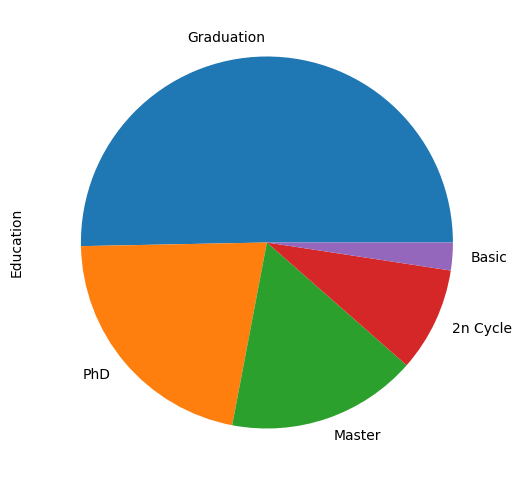

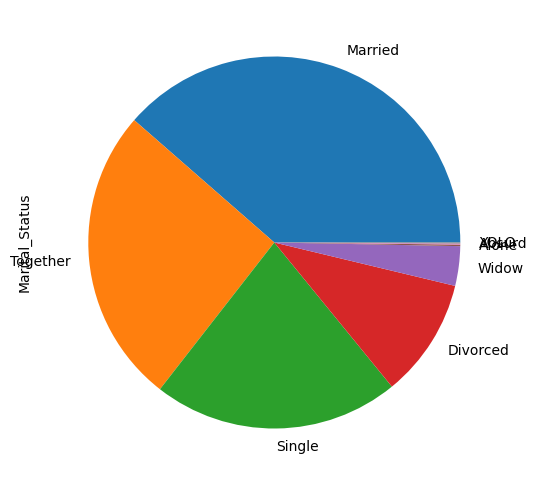

In [27]:
for i in columns:
    plt.subplots(figsize=(6,20))
    df[i].value_counts().plot(kind='pie')
    plt.show()
    

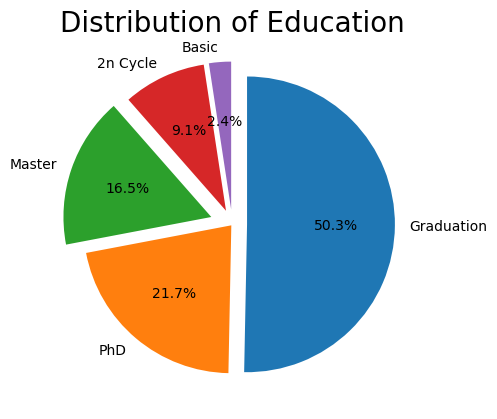

In [28]:
counts = df.Education.value_counts()
fractions = [0.1, 0.01, 0.15, 0.1, 0.1]
plt.pie(counts,labels= counts.index,startangle=90, counterclock=False, explode=fractions,autopct='%1.1f%%')
plt.title(f'Distribution of Education', fontsize=20)
plt.savefig('Education')
plt.show()

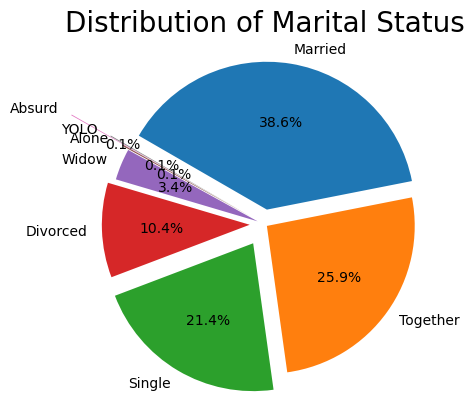

In [29]:
counts = df.Marital_Status.value_counts()
fractions = [0.1, 0.02, 0.15, 0.1, 0.05,0.1,0.5,0.2]
plt.pie(counts,labels= counts.index,startangle=150, counterclock=False, explode=fractions,autopct='%1.1f%%')
plt.title('Distribution of Marital Status', fontsize=20)
plt.savefig('Marital Status')
plt.show()

## Income Analysis

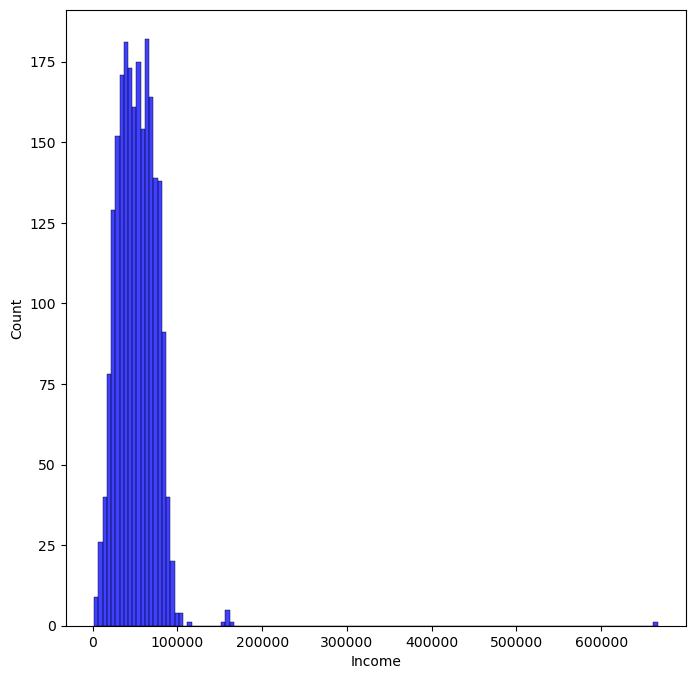

In [30]:
plt.figure(figsize=(8,8))
sns.histplot(df["Income"],color = 'blue')
plt.show()

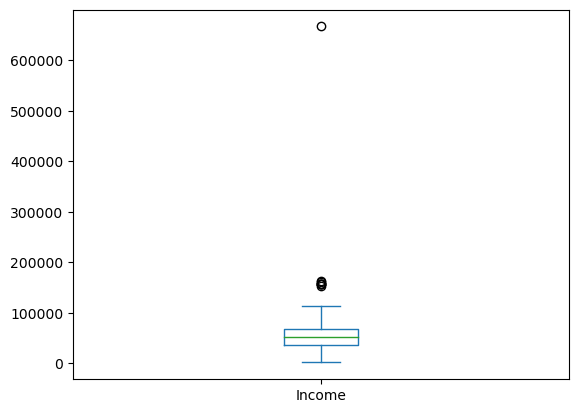

In [31]:
df["Income"].plot.box()
plt.show()

## Outlier Detection- might remove later

In [32]:
df[df.Income>500000]

ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2233         0  02-06-2013       23         9  ...                  6   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2233             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2233         0              3         11         0  

[1 rows x 29 columns]

In [33]:
a=df.drop([2233])

<AxesSubplot:>

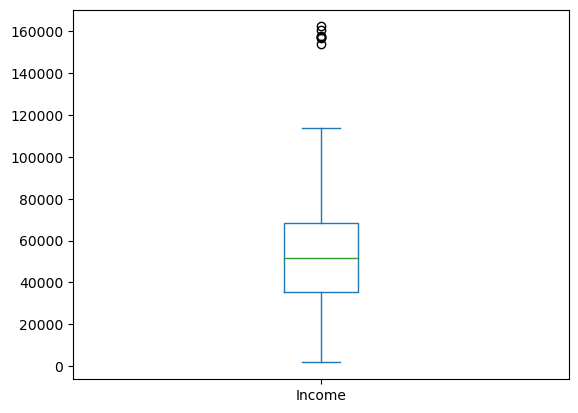

In [34]:
a.Income.plot(kind='box')

In [35]:
df['Age']= 2023- df['Year_Birth']

<AxesSubplot:>

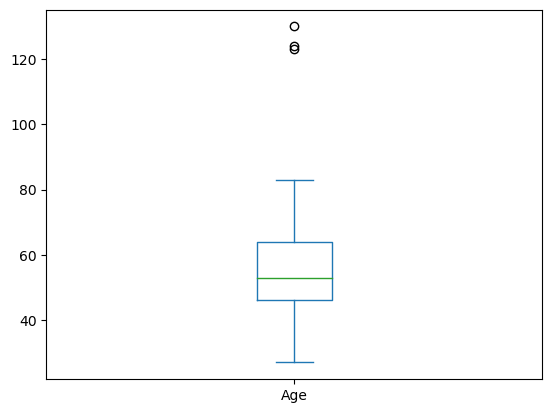

In [36]:
df.Age.plot(kind='box')

In [37]:
df[df['Age']>100]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192  26-09-2013       99        15  ...             0             0   
239  17-05-2014       23         8  ...             0             0   
339  26-09-2013       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  123  
239         11         0  130  
339         11         0  124  

[3 rows x 30 columns]

3 ages are above 100, might be outlier.

In [38]:
#COnverting into datetime
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

C:\Users\User\AppData\Local\Temp\ipykernel_7160\3733824818.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_7160\3733824818.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_7160\3733824818.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])
C:\Users\User\AppData\Local\Temp\ipykernel_7160\3733824818.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer']= pd.to_datetime(df['Dt_

In [39]:
## Oldest customer in data set
df.Dt_Customer.min()

Timestamp('2012-01-08 00:00:00')

In [40]:
## Newest customer: 
df.Dt_Customer.max()

Timestamp('2014-12-06 00:00:00')

<AxesSubplot:>

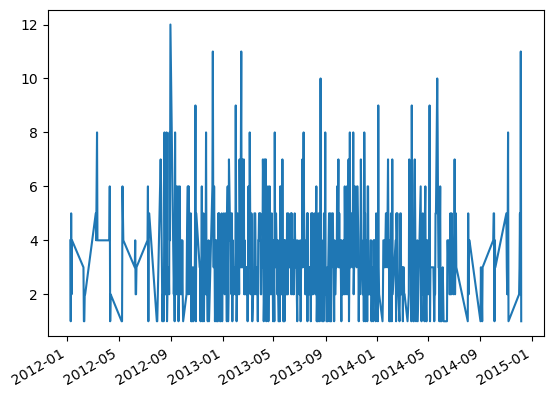

In [41]:
df.Dt_Customer.value_counts().plot()

## Outlier Removal

In [42]:
df=df.drop(2233)

In [43]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  2012-04-09       58       635  ...             0   
1            1  2014-08-03       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-10-02       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-10-06       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Age  
0                 3         11         1   66  
1                 3         11         0   69  
2                 3         11         0   58  
3                 3         11         0   39  
4                 3         11         0   42  
...             ...        ...       ...  ...  
2235              3         11         0   56  
2236              3         11         0   77  
2237              3         11         0   42  
2238              3         11         0   67  
2239              3         11         1   69  

[2239 rows x 30 columns]

In [44]:
df[df['Age']>100]

ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
192  2013-09-26       99        15  ...             0             0   
239  2014-05-17       23         8  ...             0             0   
339  2013-09-26       36       755  ...             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
192             0             0             0         1              3   
239             0             0             0         0              3   
339             1             0             0         0              3   

     Z_Revenue  Response  Age  
192         11         0  123  
239         11         0  130  
339         11         0  124  

[3 rows x 30 columns]

In [45]:
df=df.drop([192,239,339])

In [46]:
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  2012-04-09       58       635  ...             0   
1            1  2014-08-03       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-10-02       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-10-06       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Age  
0                 3         11         1   66  
1                 3         11         0   69  
2                 3         11         0   58  
3                 3         11         0   39  
4                 3         11         0   42  
...             ...        ...       ...  ...  
2235              3         11         0   56  
2236              3         11         0   77  
2237              3         11         0   42  
2238              3         11         0   67  
2239              3         11         1   69  

[2236 rows x 30 columns]

## New dataframe to do further analysis

In [47]:
data=df.copy()

In [48]:
data

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  \
0            0  2012-04-09       58       635  ...             0   
1            1  2014-08-03       38        11  ...             0   
2            0  2013-08-21       26       426  ...             0   
3            0  2014-10-02       26        11  ...             0   
4            0  2014-01-19       94       173  ...             0   
...        ...         ...      ...       ...  ...           ...   
2235         1  2013-06-13       46       709  ...             0   
2236         1  2014-10-06       56       406  ...             0   
2237         0  2014-01-25       91       908  ...             0   
2238         1  2014-01-24        8       428  ...             0   
2239         1  2012-10-15       40        84  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  Age  
0                 3         11         1   66  
1                 3         11         0   69  
2                 3         11         0   58  
3                 3         11         0   39  
4                 3         11         0   42  
...             ...        ...       ...  ...  
2235              3         11         0   56  
2236              3         11         0   77  
2237              3         11         0   42  
2238              3         11         0   67  
2239              3         11         1   69  

[2236 rows x 30 columns]

### Creating new columns as total spent which is calculated by adding all the spent by a customer

In [49]:
data['total_spent']= data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

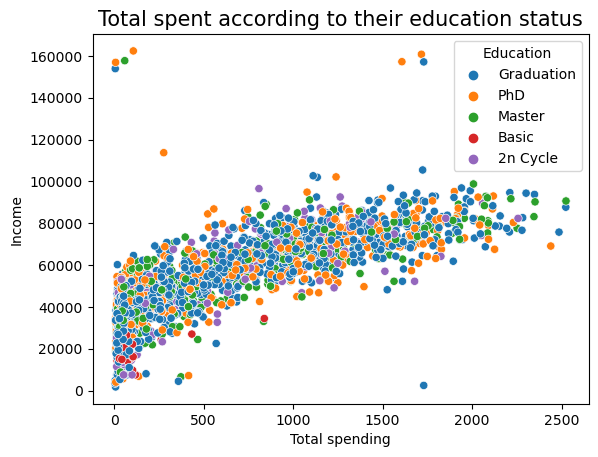

In [50]:
sns.scatterplot(x=data.total_spent, y=data.Income,hue=df.Education)
plt.title('Total spent according to their education status', fontsize=15)
plt.xlabel('Total spending')
plt.show()

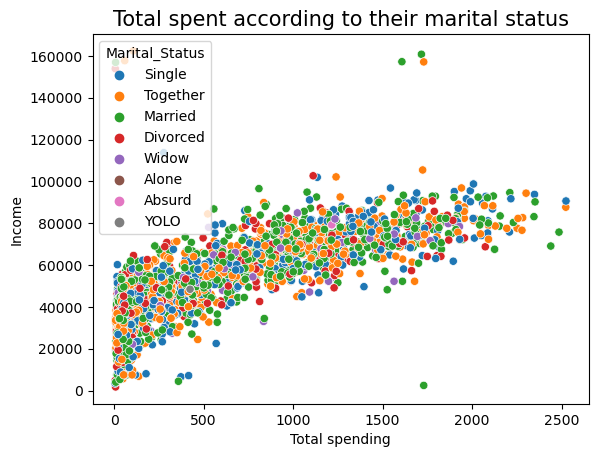

In [51]:
sns.scatterplot(x=data.total_spent, y=data.Income,hue=df.Marital_Status)
plt.title('Total spent according to their marital status', fontsize=15)
plt.xlabel('Total spending')
plt.show()

In [52]:
data['Education']=data['Education'].replace(['Basic','2n Cycle'],'Under Graduate')

In [53]:
data['Education']=data['Education'].replace(['Master','PhD'],'Post Graduate')

In [54]:
data['Education']= data['Education'].replace(['Graduation'],'Graduate')

In [55]:
data.Education.value_counts()

Graduate          1126
Post Graduate      855
Under Graduate     255
Name: Education, dtype: int64

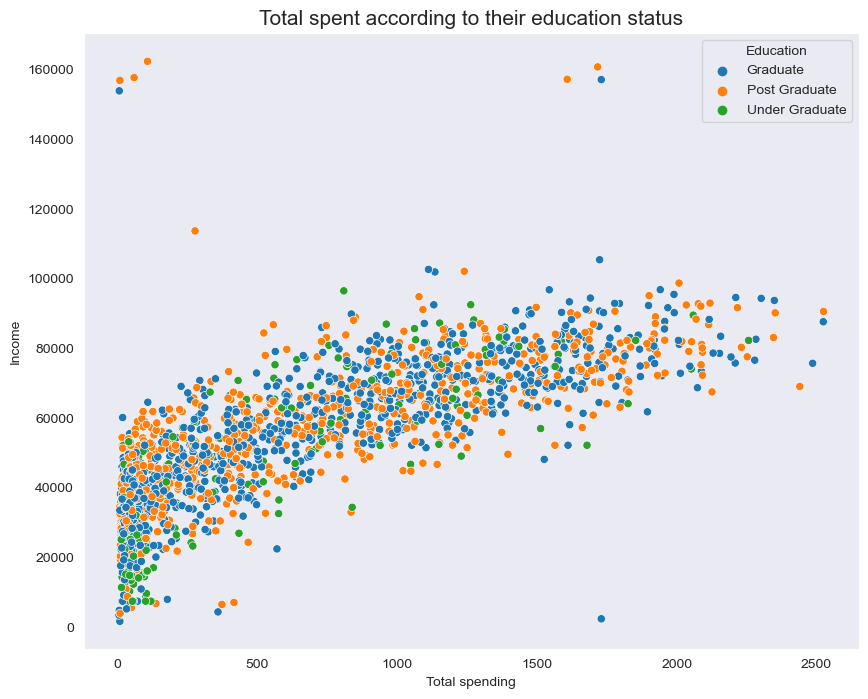

In [56]:
plt.figure(figsize=(10,8))
sns.set_style(style='dark')
sns.scatterplot(x=data.total_spent, y=data.Income,hue=data.Education,alpha=1)
plt.title('Total spent according to their education status', fontsize=15)
plt.xlabel('Total spending')
plt.savefig('Education-Income.png')
plt.show()

In [57]:
df.Education.value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

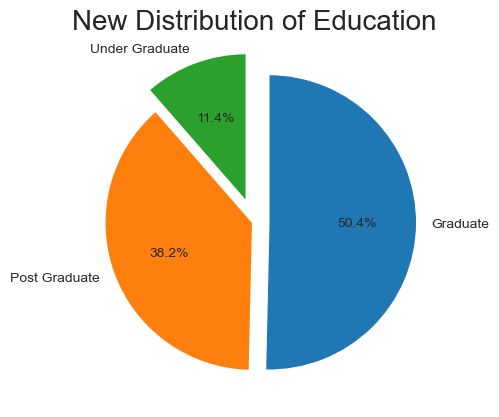

In [58]:
counts=data.Education.value_counts()
fractions= [0.1, 0.01, 0.15]
plt.pie(counts,labels= counts.index,startangle=90, counterclock=False, explode=fractions,autopct='%1.1f%%')
plt.title('New Distribution of Education',fontsize=20)
plt.savefig('Education2.png')
plt.show()

<AxesSubplot:>

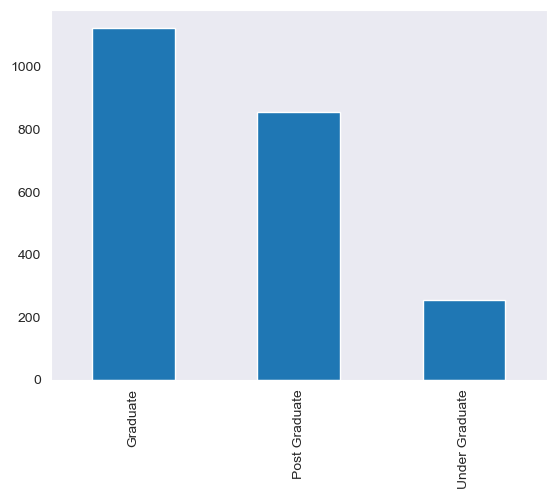

In [59]:
data.Education.value_counts().plot(kind='bar')

In [60]:
data['Marital_Status'].value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

<AxesSubplot:xlabel='total_spent', ylabel='Income'>

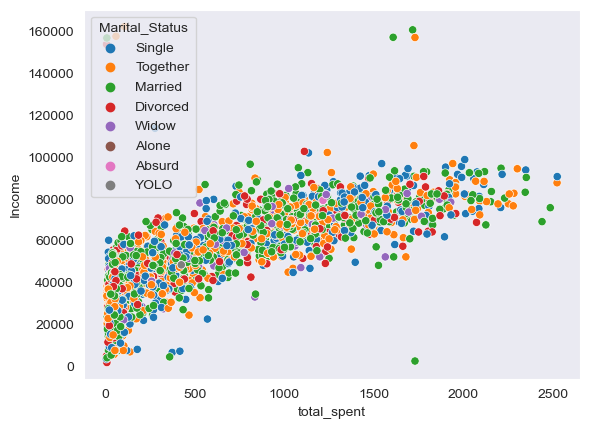

In [61]:
sns.scatterplot(x=data.total_spent, y=data.Income,hue=data.Marital_Status,alpha=1)

In [62]:
data['Marital_Status']=data['Marital_Status'].replace(['Married','Together'],'In Relationship')

In [63]:
data['Marital_Status']=data['Marital_Status'].replace(['Single','Divorced','Widow', 'Alone','Absurd','YOLO'],'Single')

In [64]:
data.Marital_Status.value_counts()

In Relationship    1442
Single              794
Name: Marital_Status, dtype: int64

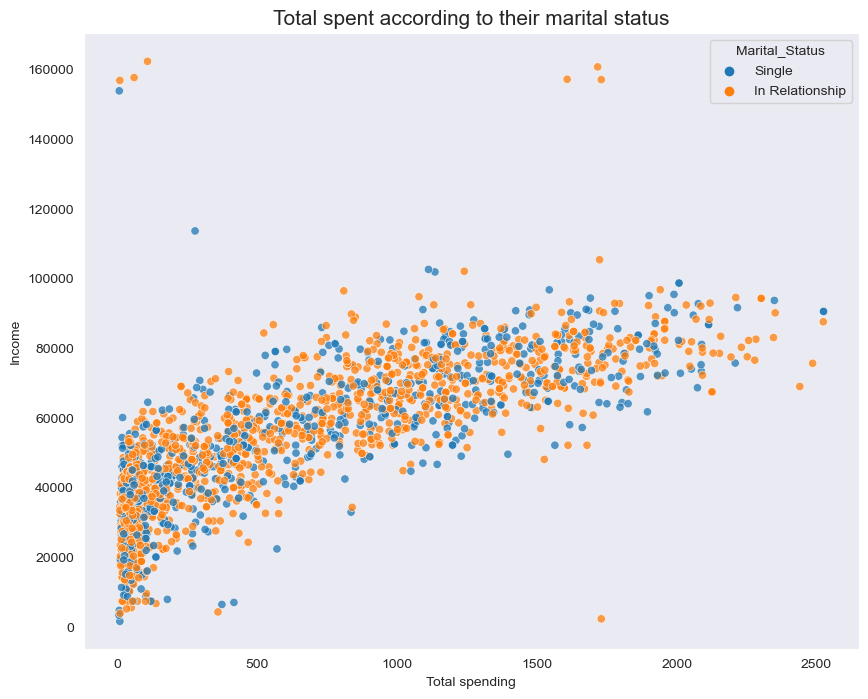

In [65]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data.total_spent, y=data.Income,hue=data.Marital_Status,alpha=0.75)
plt.title('Total spent according to their marital status', fontsize=15)
plt.xlabel('Total spending')
plt.savefig('Marital-Spending.png')
plt.show()

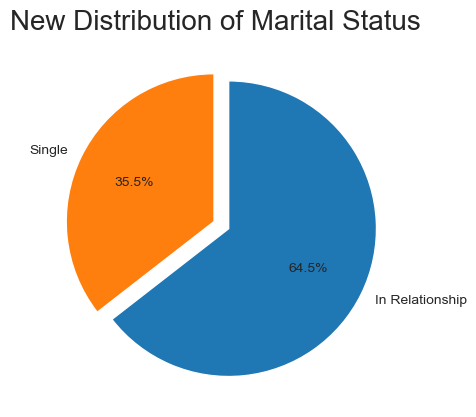

In [66]:
counts=data.Marital_Status.value_counts()
fractions= [0.1, 0.01]
plt.pie(counts,labels= counts.index,startangle=90, counterclock=False, explode=fractions,autopct='%1.1f%%')
plt.title('New Distribution of Marital Status',fontsize=20)
plt.savefig('Marital-Status2.png')
plt.show()

In [67]:
data['parent']= data['Kidhome']+data['Teenhome']

In [68]:
data['parent'].value_counts()

1    1125
0     637
2     421
3      53
Name: parent, dtype: int64

<AxesSubplot:>

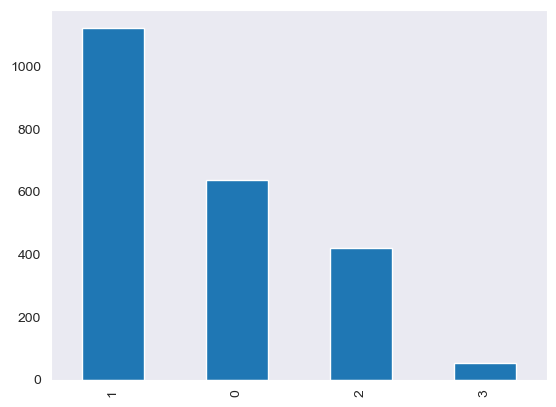

In [69]:
data['parent'].value_counts().plot(kind='bar')

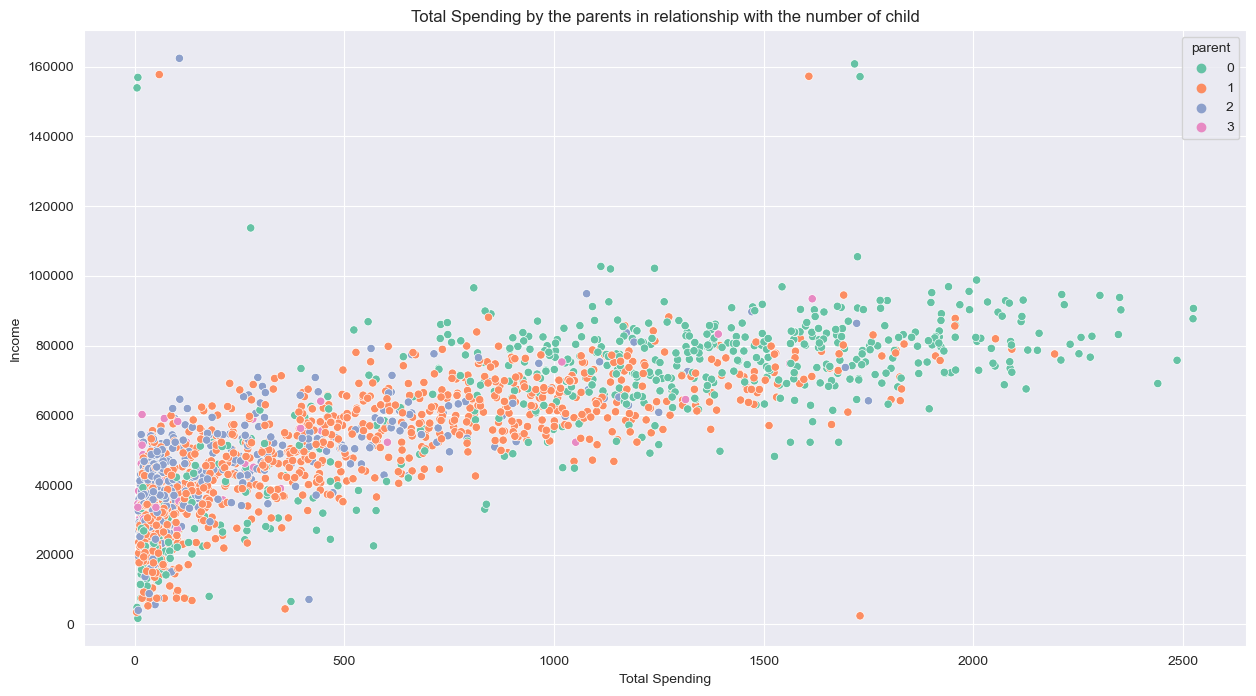

In [70]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
sns.scatterplot(x=data.total_spent, y=data.Income,hue=data.parent,alpha=1,palette='Set2')
plt.title('Total Spending by the parents in relationship with the number of child')
plt.xlabel('Total Spending')
plt.savefig('Parents-Spending.png')
plt.show()

People having no child spends more.

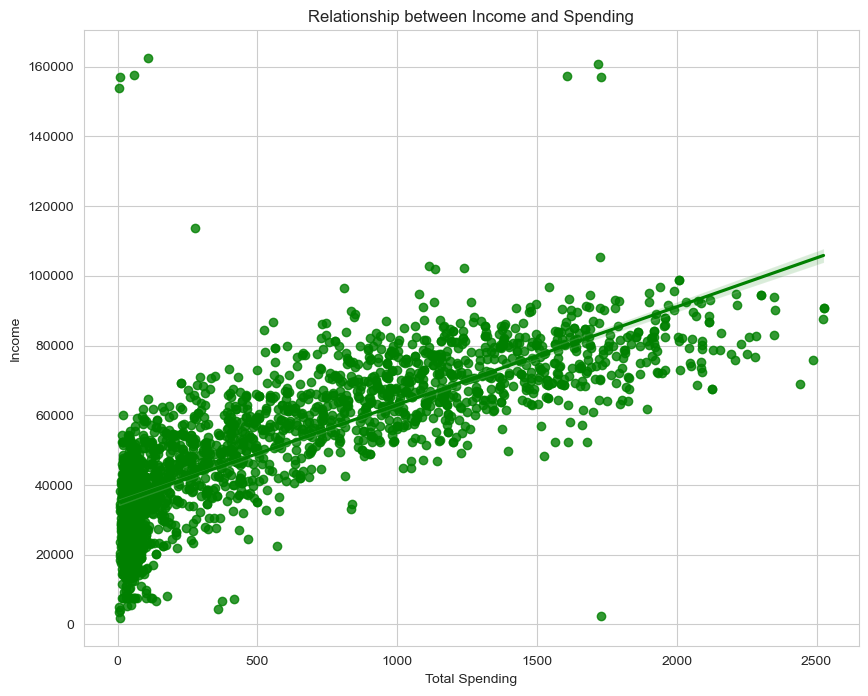

In [71]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
sns.regplot(y=data.Income, x=data.total_spent, data=data,color='g')
plt.title('Relationship between Income and Spending')
plt.xlabel('Total Spending')
plt.savefig('IncomevsSpending.png')
plt.show()

In [72]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_spent', 'parent'],
      dtype='object')

In [73]:
data.Complain.value_counts()

0    2216
1      20
Name: Complain, dtype: int64

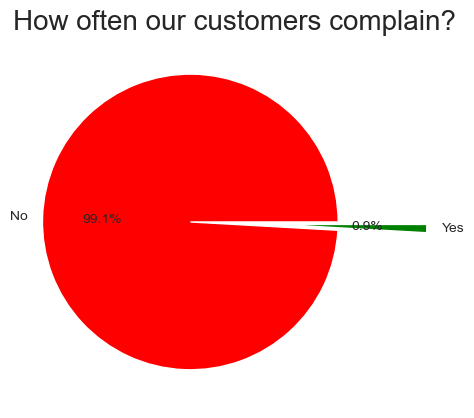

In [74]:
fig,ax= plt.subplots()
ax.pie(df.Complain.value_counts(),labels=('No','Yes'), autopct='%1.1f%%',explode=[0.3,0.3], colors=['red','green'])
ax.set_title('How often our customers complain?',fontsize=20)
plt.savefig('Complains')
plt.show()

Team is doing great because we are getting less complains

In [75]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_spent', 'parent'],
      dtype='object')

In [76]:
cols=data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','total_spent']]

array([<AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>, <AxesSubplot:ylabel='Frequency'>,
       <AxesSubplot:ylabel='Frequency'>], dtype=object)

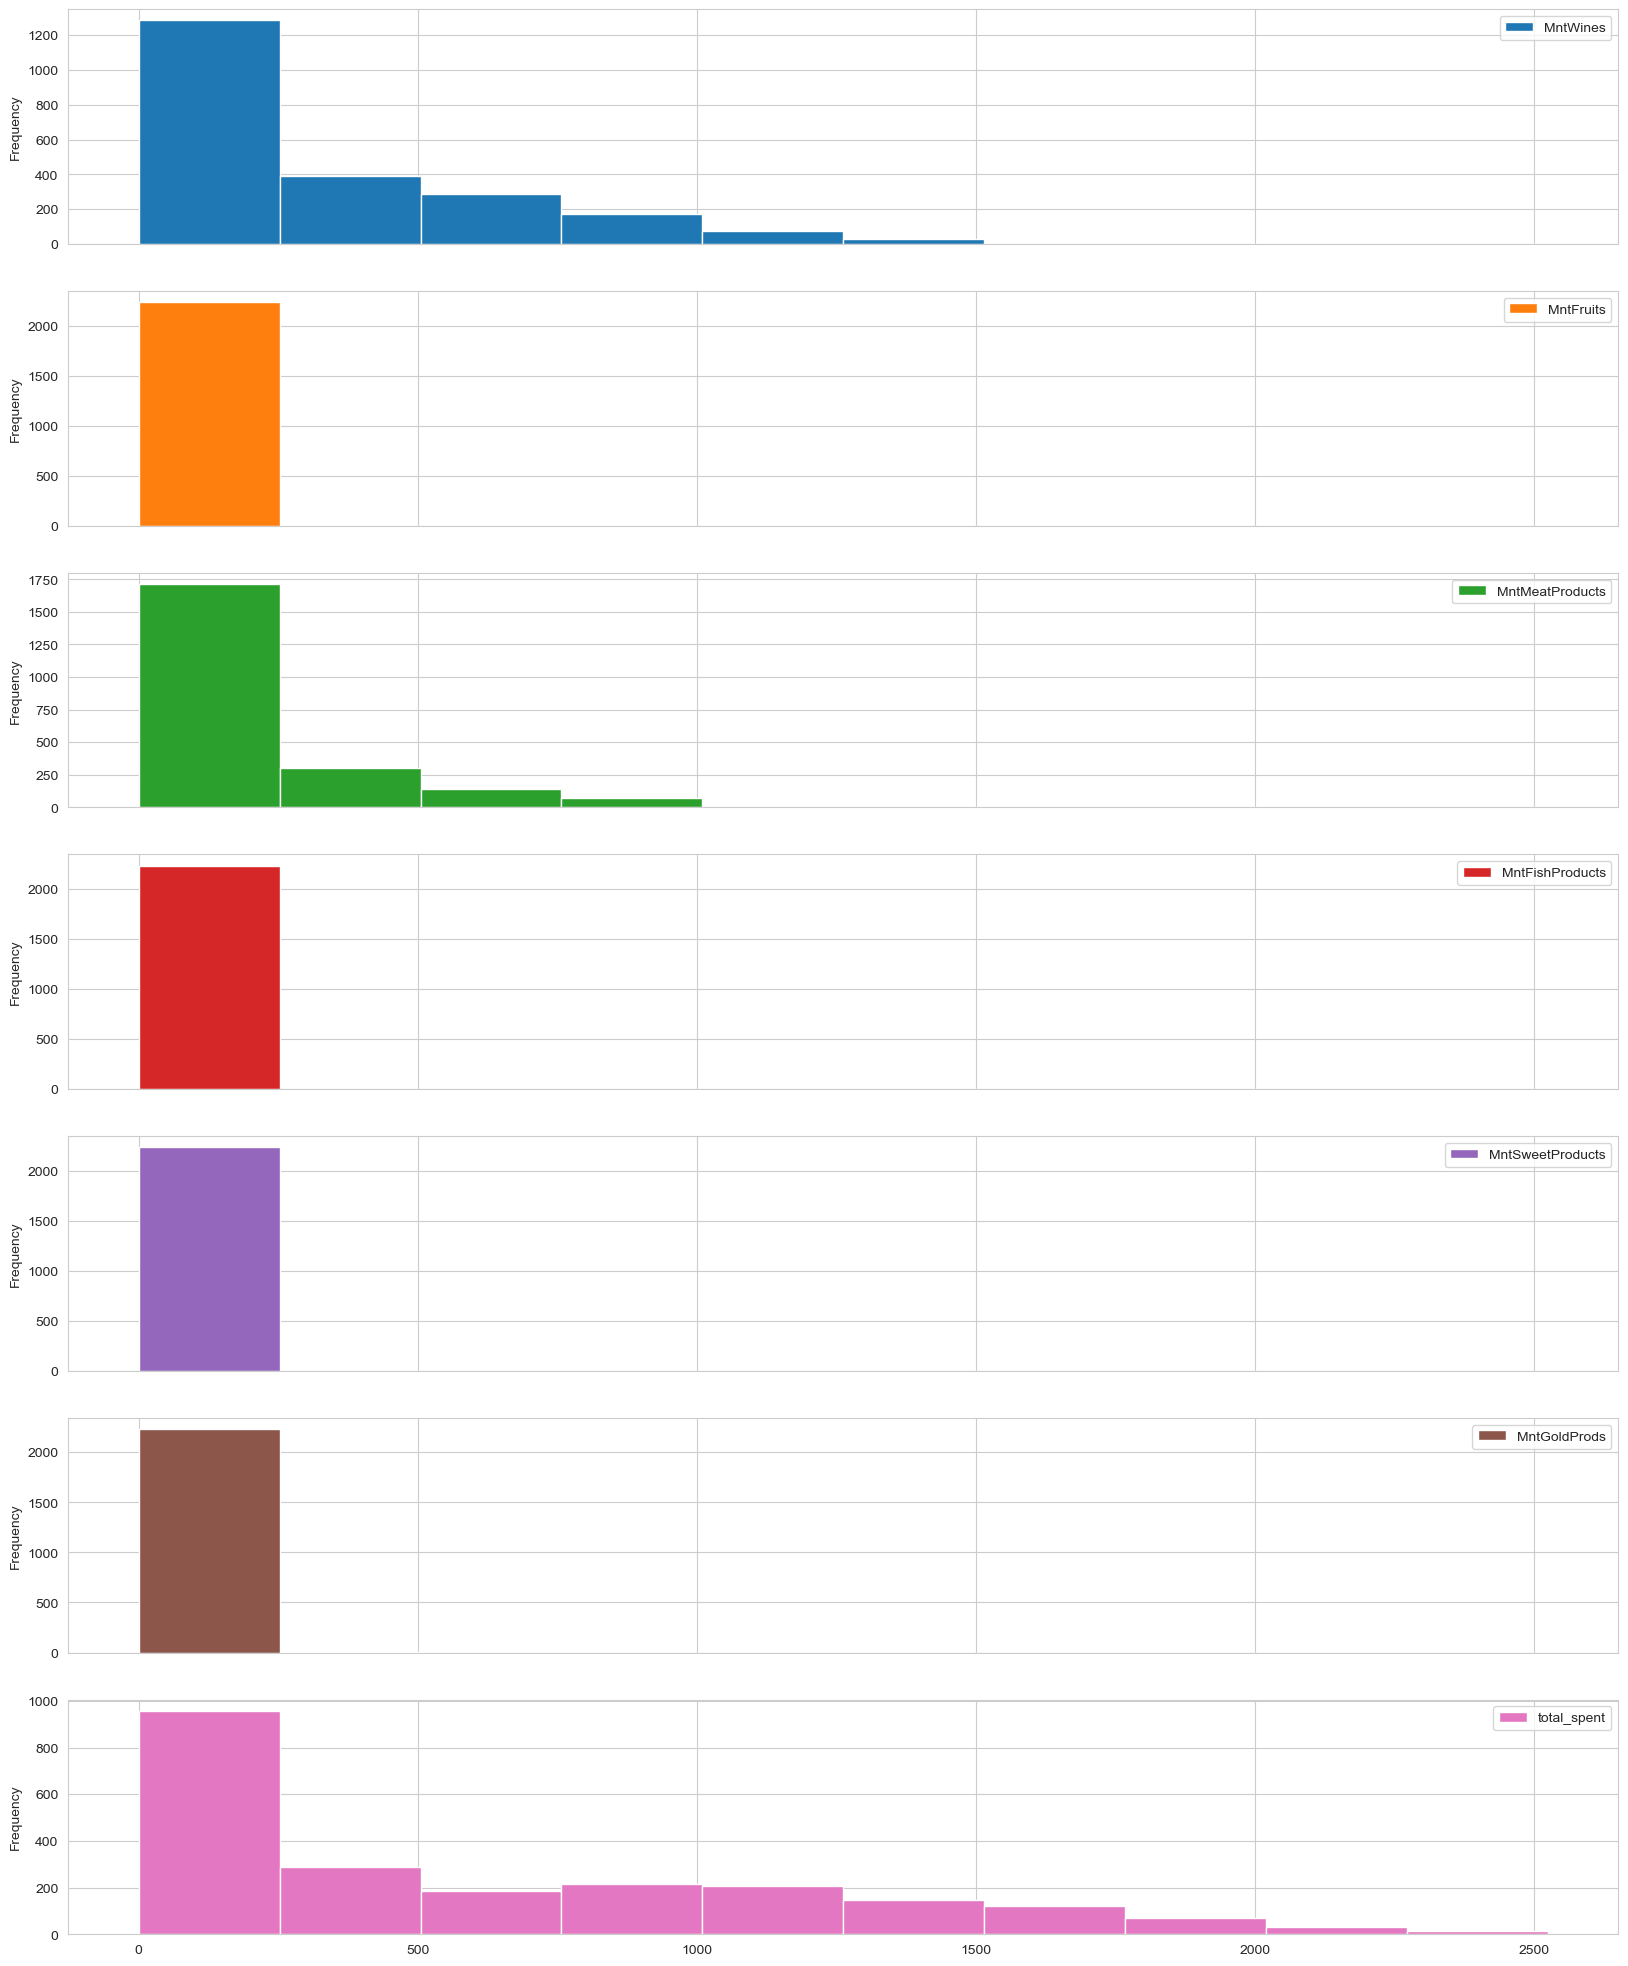

In [77]:
cols.plot(kind='hist',subplots=True,figsize=(20,25))

In [78]:
column=data[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]

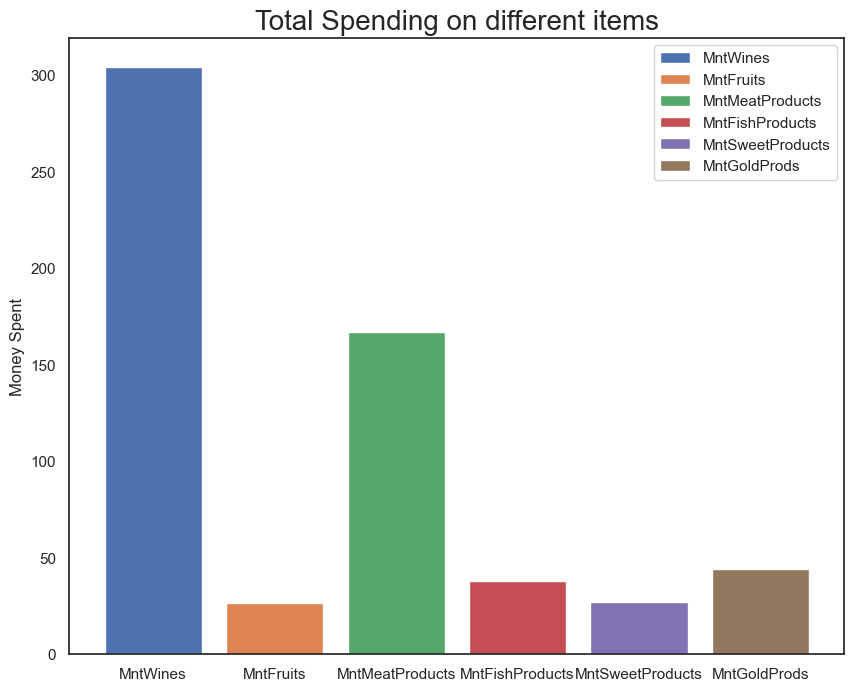

In [167]:
plt.figure(figsize=(10,8))
plt.title('Total Spending on different items', fontsize=20)
plt.ylabel('Money Spent')
for i in column.columns:
    mean_spendings= data[i].mean()
    plt.bar(i,mean_spendings,label=i)
    plt.legend()
plt.savefig('Individual Spending.png')
plt.show()

In [175]:
spendings= data.groupby('total_accepted_coupons')[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum()

<AxesSubplot:xlabel='total_accepted_coupons'>

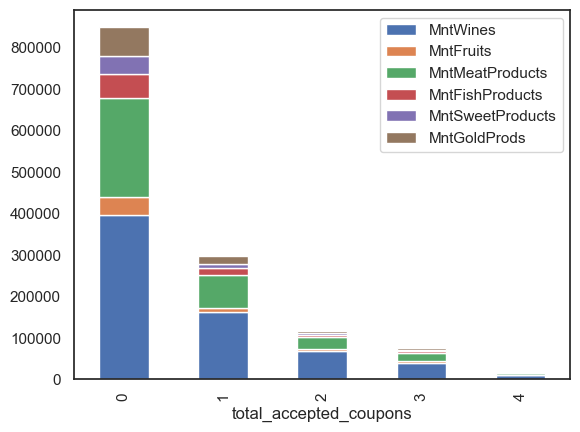

In [179]:
spendings.plot(kind='bar',stacked=True)

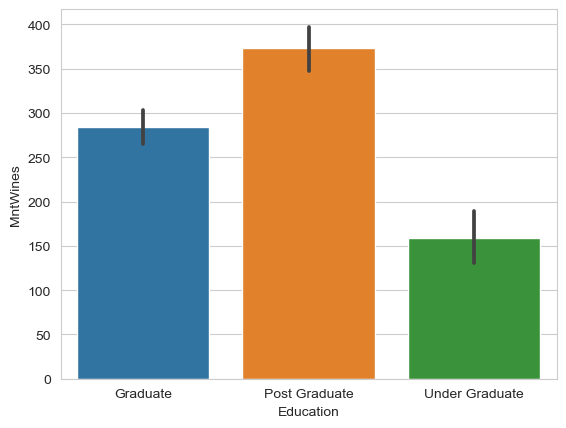

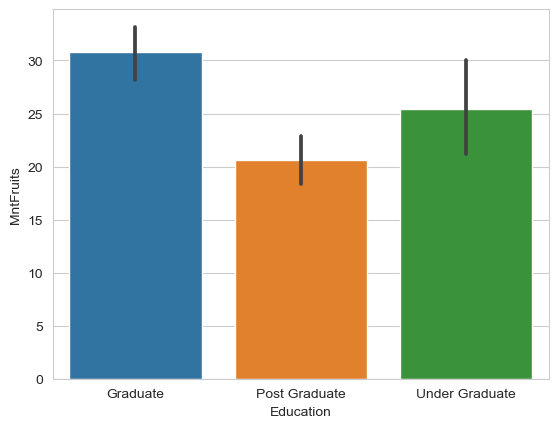

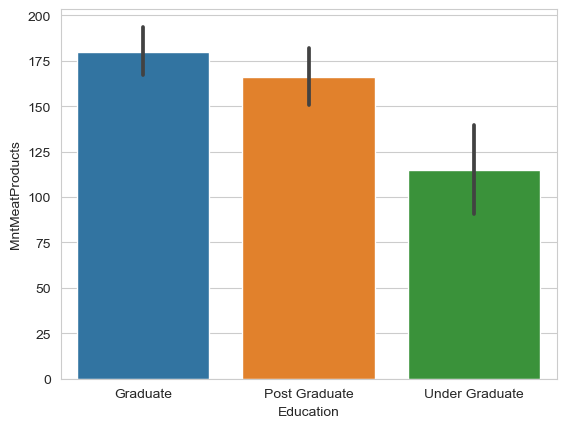

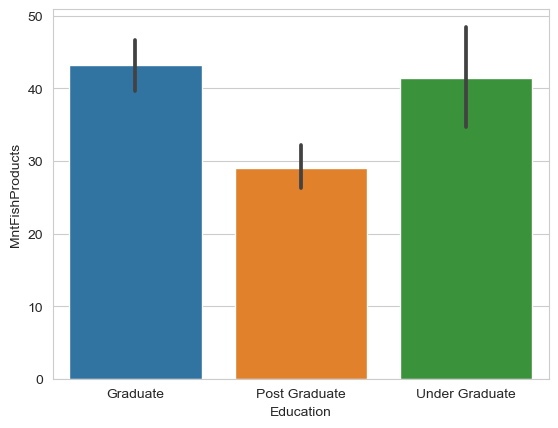

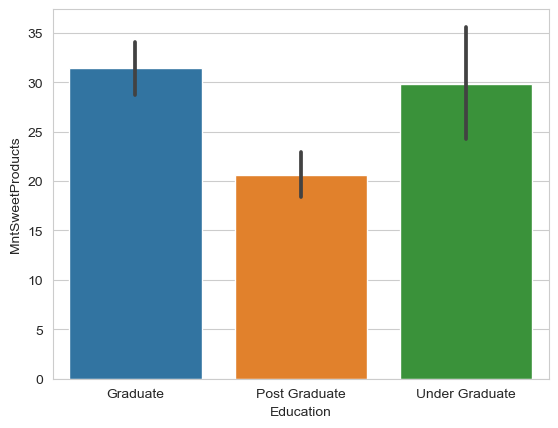

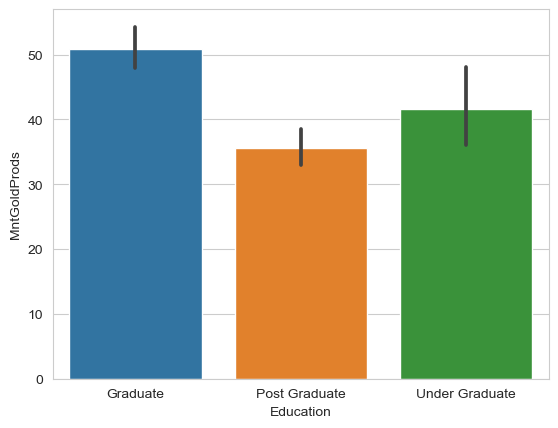

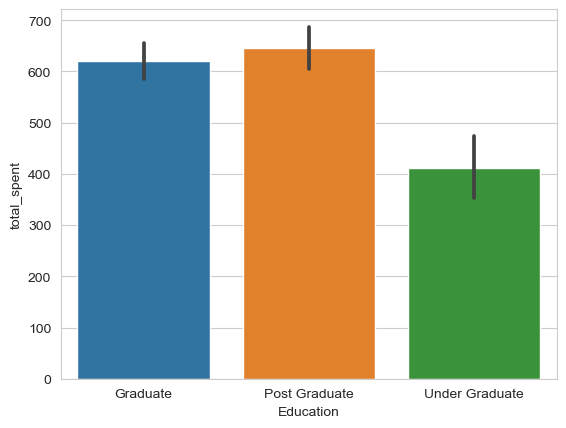

In [80]:
for i in cols:
    plt.subplots()
    sns.barplot(y=i, x=data.Education, data=data)

In [81]:
data.Age.value_counts(sort=True)

47    89
52    87
48    83
51    79
45    77
53    77
58    74
50    74
54    71
49    69
67    55
65    53
44    53
71    52
55    51
46    51
64    51
57    50
69    50
68    49
63    49
41    45
60    45
56    44
61    44
66    43
72    43
40    42
37    42
59    42
43    39
42    39
39    38
62    36
70    35
38    32
34    30
74    30
73    29
35    29
36    27
75    21
33    18
77    16
76    16
32    15
31    13
78     8
80     7
79     7
30     5
28     5
29     3
27     2
82     1
83     1
Name: Age, dtype: int64

In [82]:
data['age_cat']=pd.cut(data.Age, bins=3, labels=['Younger-Adults','MiddleAged-Adult','Older-Adults'])

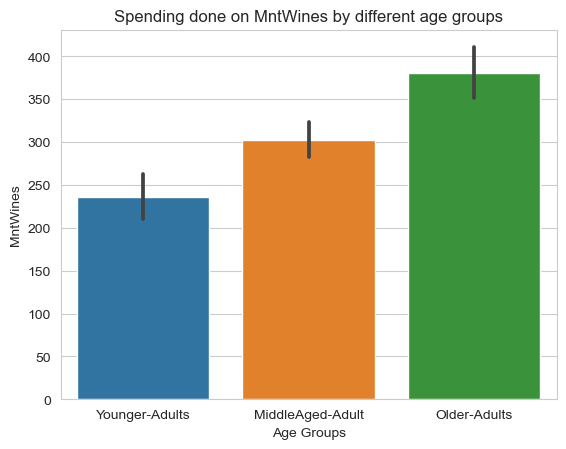

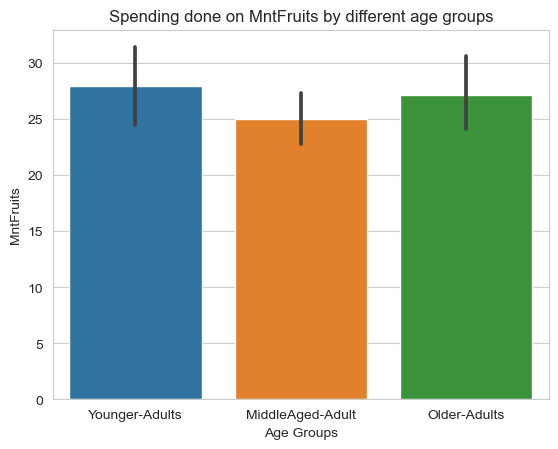

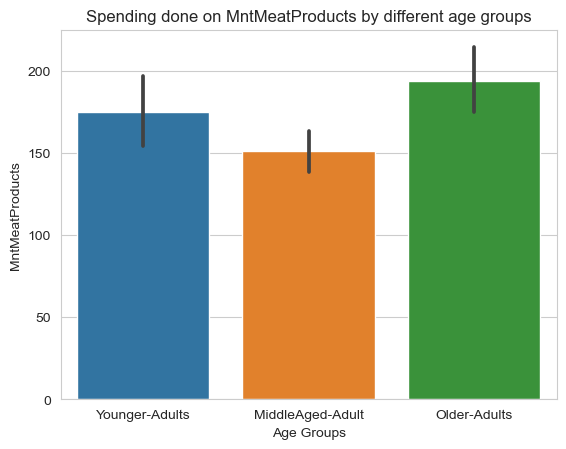

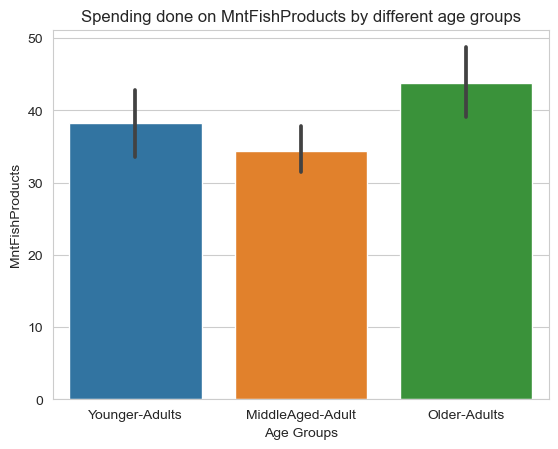

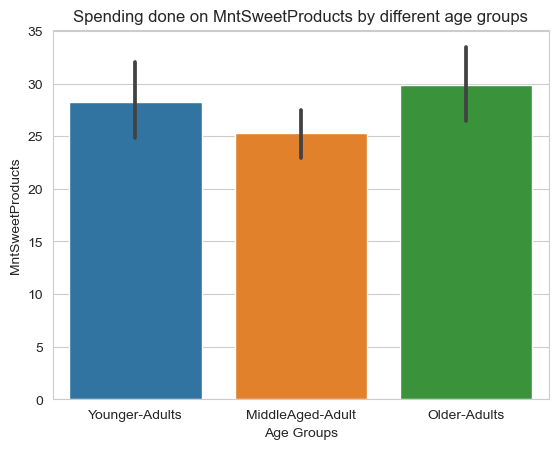

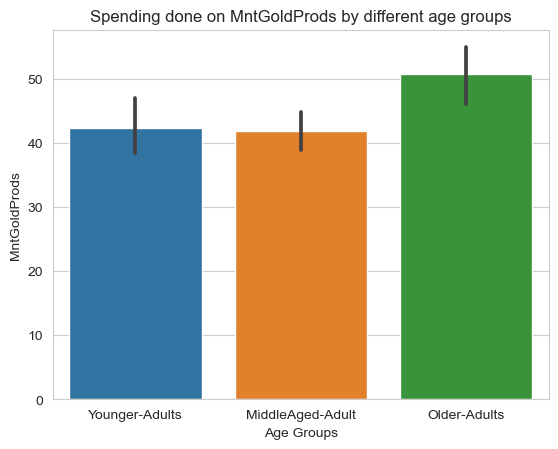

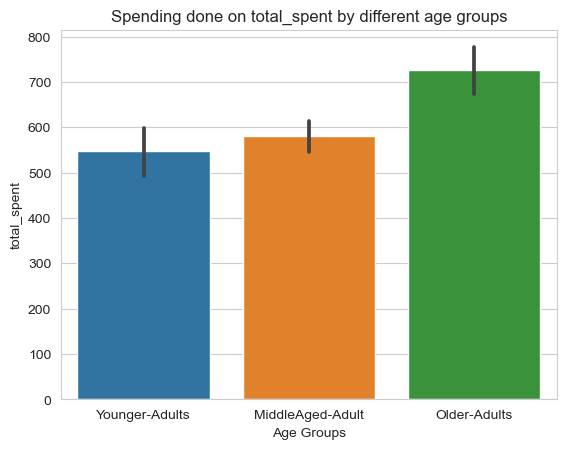

In [83]:
for i in cols:
    plt.subplots()
    sns.barplot(y=i, x=data.age_cat, data=data)
    plt.title(f'Spending done on {i} by different age groups')
    plt.xlabel('Age Groups')

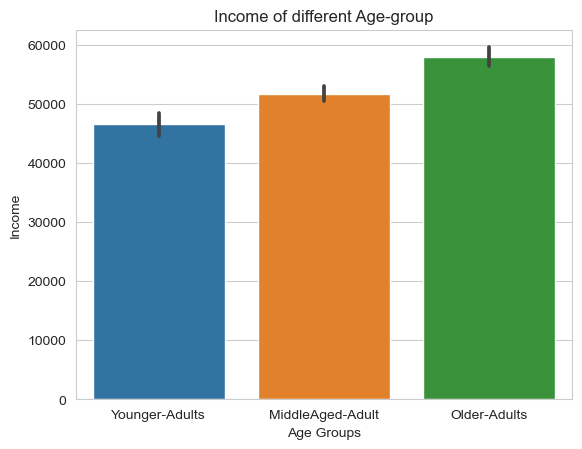

In [84]:
sns.barplot(y=data.Income, x=data.age_cat, data=data)
plt.title(f'Income of different Age-group')
plt.xlabel('Age Groups')
plt.savefig('AgegroupvsIncome.png')
plt.show()

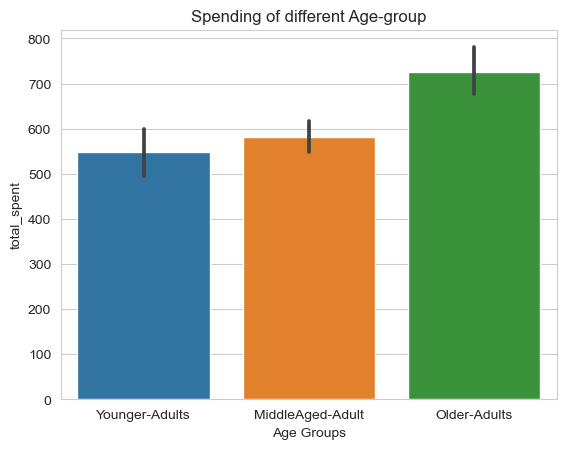

In [85]:
sns.barplot(y=data.total_spent, x=data.age_cat, data=data)
plt.title(f'Spending of different Age-group')
plt.xlabel('Age Groups')
plt.savefig('AgegroupvsSpending.png')
plt.show()

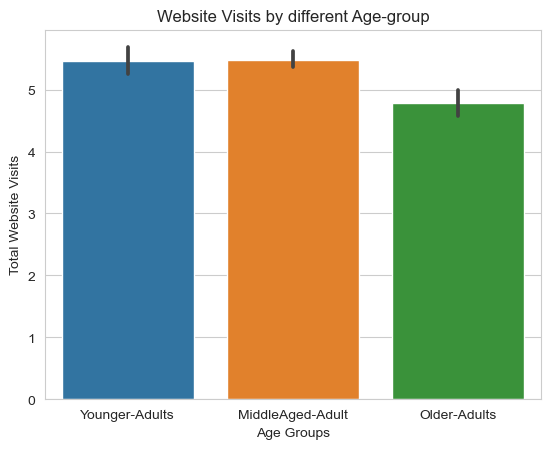

In [86]:
sns.barplot(y=data.NumWebVisitsMonth, x=data.age_cat, data=data)
plt.title(f'Website Visits by different Age-group')
plt.xlabel('Age Groups')
plt.ylabel('Total Website Visits') 
plt.savefig('WebsiteVisit.png')
plt.show()

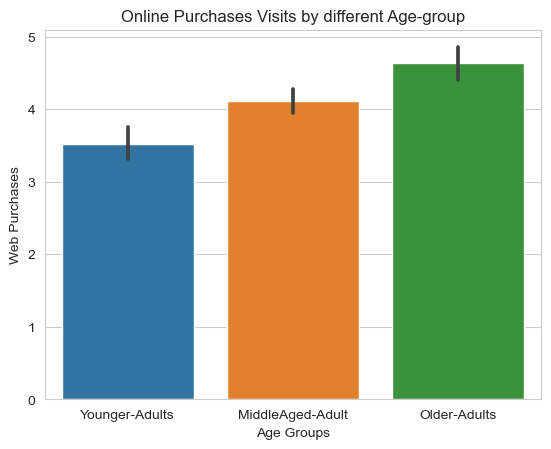

In [87]:
sns.barplot(y=data.NumWebPurchases, x=data.age_cat, data=data)
plt.title(f'Online Purchases Visits by different Age-group')
plt.xlabel('Age Groups')
plt.ylabel('Web Purchases')
plt.savefig('OnlinePurchases.png')
plt.show()

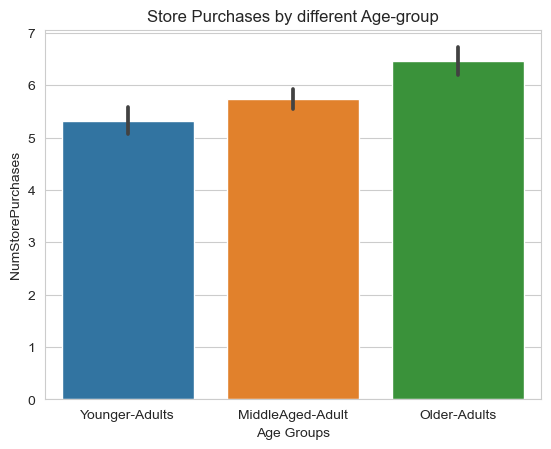

In [88]:
sns.barplot(y=data.NumStorePurchases, x=data.age_cat, data=data)
plt.title(f'Store Purchases by different Age-group')
plt.xlabel('Age Groups')
plt.savefig('StorePurchases.png')
plt.show()

In [89]:
data.Response.value_counts()

0    1902
1     334
Name: Response, dtype: int64

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

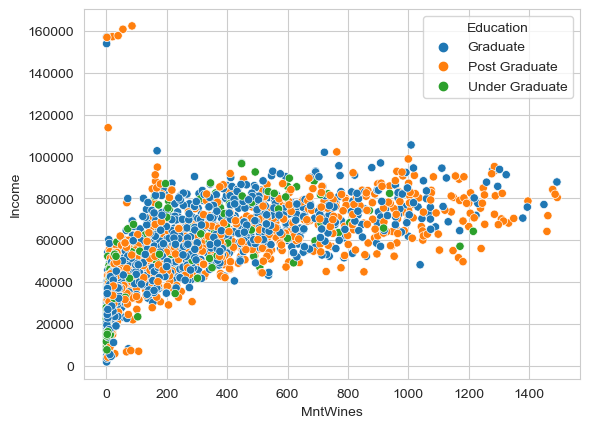

In [90]:
sns.scatterplot(x=data.MntWines, y=data.Income, hue=data.Education)

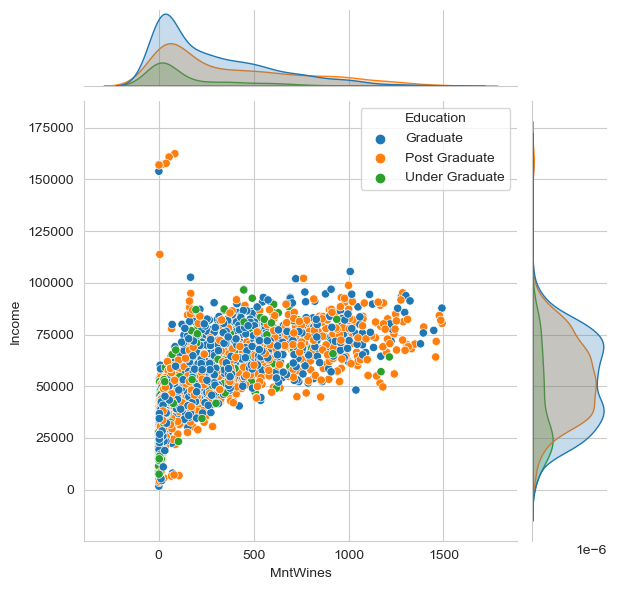

In [91]:
sns.jointplot(x=data.MntWines, y=data.Income, hue=data.Education)

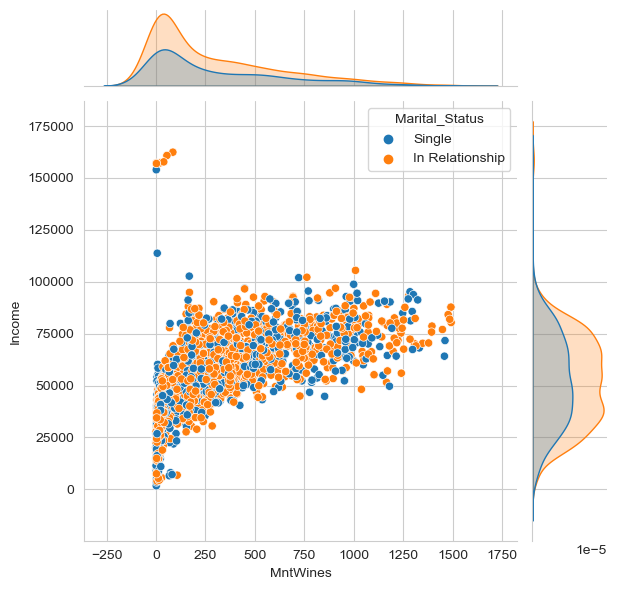

In [92]:
sns.jointplot(x=data.MntWines, y=data.Income, hue=data.Marital_Status)

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

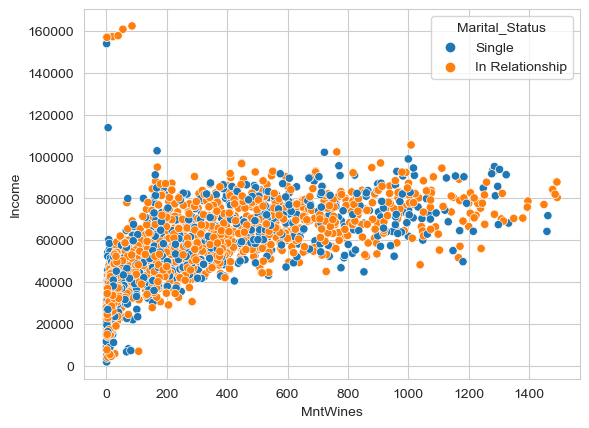

In [93]:
sns.scatterplot(x=data.MntWines, y=data.Income, hue=data.Marital_Status)

<AxesSubplot:xlabel='MntSweetProducts', ylabel='Income'>

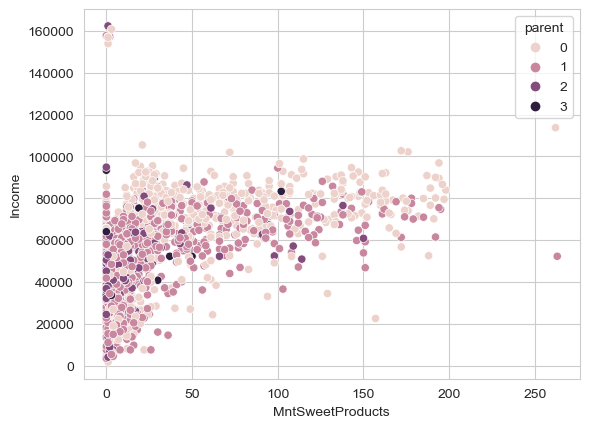

In [94]:
sns.scatterplot(x=data.MntSweetProducts, y=data.Income, hue=data.parent)

<AxesSubplot:xlabel='MntWines', ylabel='Income'>

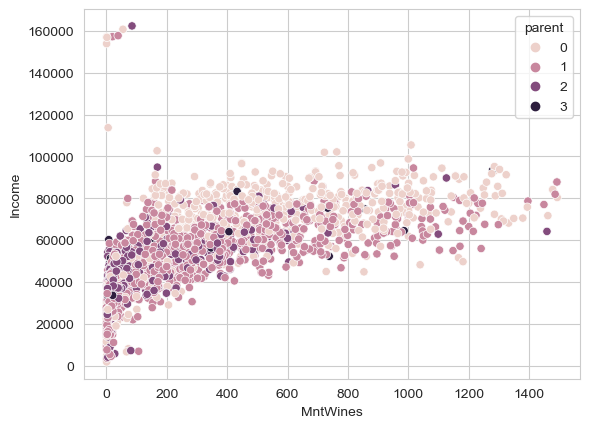

In [95]:
sns.scatterplot(x=data.MntWines, y=data.Income, hue=data.parent)

<AxesSubplot:xlabel='MntGoldProds', ylabel='Income'>

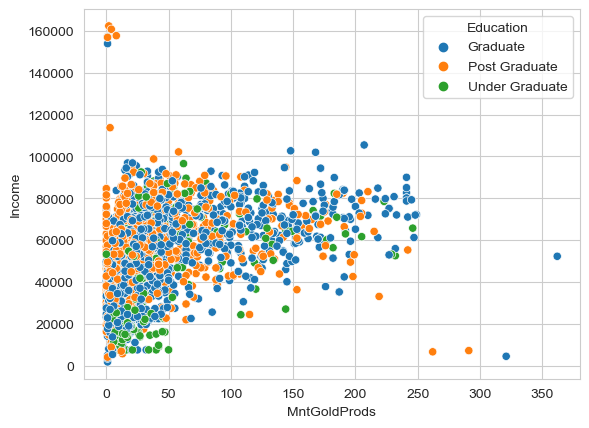

In [96]:
sns.scatterplot(x=data.MntGoldProds, y=data.Income, hue=data.Education)

<AxesSubplot:xlabel='Education', ylabel='Income'>

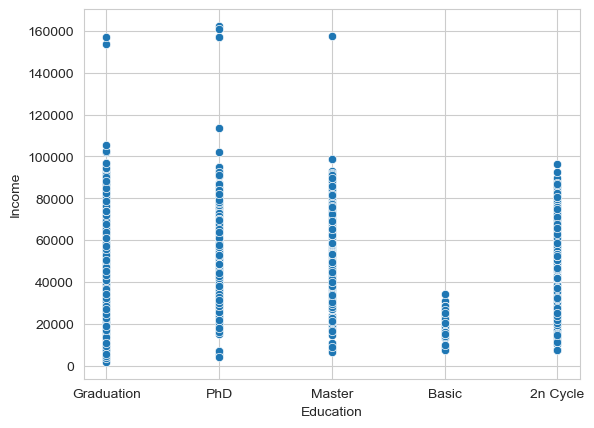

In [97]:
sns.scatterplot(y=df.Income, x=df.Education)

<AxesSubplot:xlabel='Recency', ylabel='Education'>

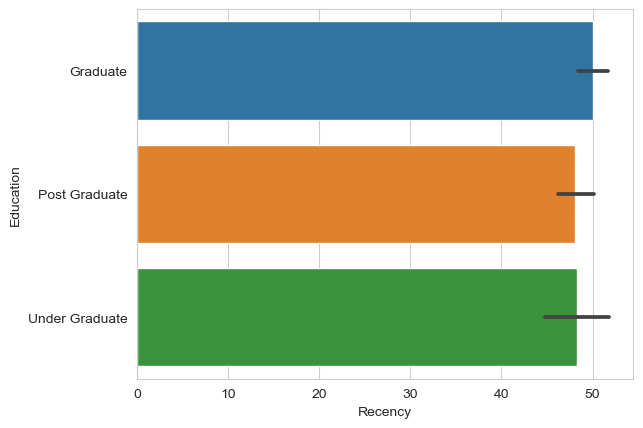

In [98]:
sns.barplot(x=df.Recency, y=data.Education)


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

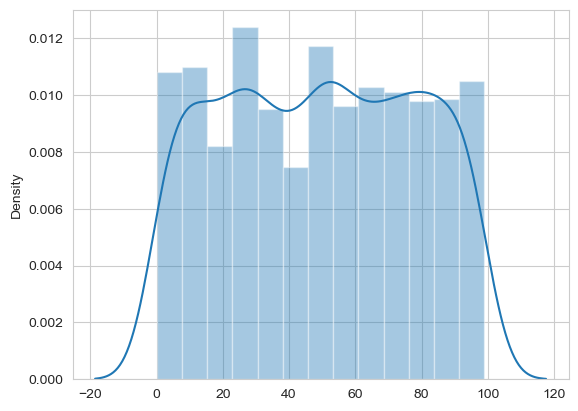

In [99]:
sns.distplot(x=df.Recency)

In [100]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_spent', 'parent', 'age_cat'],
      dtype='object')

In [101]:
data['total_accepted_coupons']= data['AcceptedCmp3']+ data['AcceptedCmp4']+ data['AcceptedCmp5']+ data['AcceptedCmp1']+data['AcceptedCmp2']

In [102]:
data.total_accepted_coupons.value_counts()

0    1774
1     324
2      83
3      44
4      11
Name: total_accepted_coupons, dtype: int64

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='total_spent'>

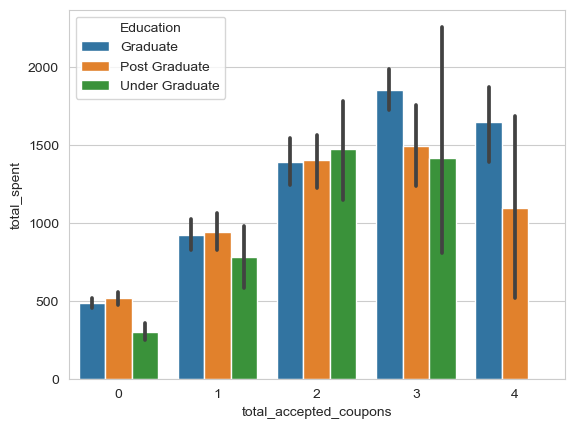

In [103]:
sns.barplot(x=data.total_accepted_coupons,y=data.total_spent,data=data, hue=data.Education)

<AxesSubplot:xlabel='total_accepted_coupons', ylabel='Income'>

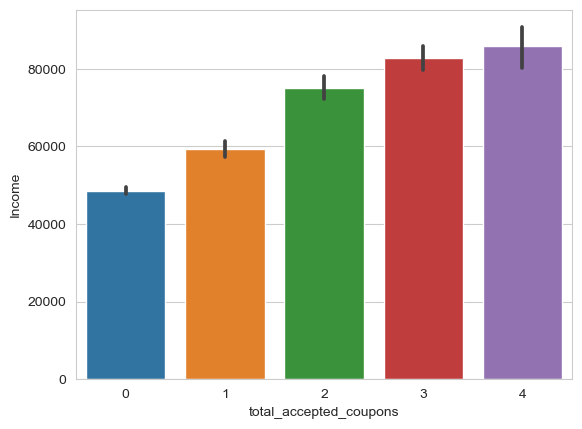

In [104]:
sns.barplot(x=data.total_accepted_coupons,y=data.Income,data=data)

<AxesSubplot:>

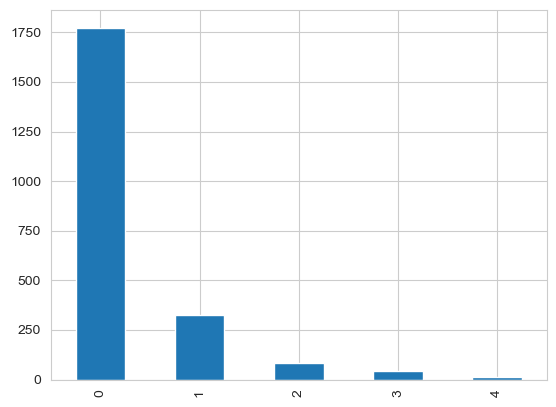

In [105]:
data.total_accepted_coupons.value_counts().plot(kind='bar')

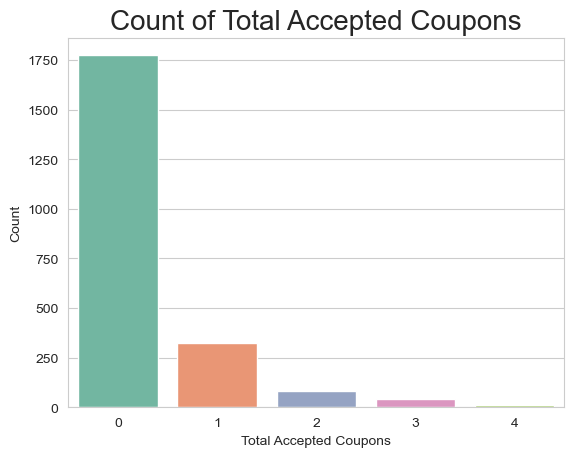

In [106]:
sns.countplot(x=data.total_accepted_coupons,data=data,palette='Set2')
plt.xlabel('Total Accepted Coupons')
plt.ylabel('Count')
plt.title('Count of Total Accepted Coupons', fontsize=20)
plt.savefig('Coupons.png')
plt.show()

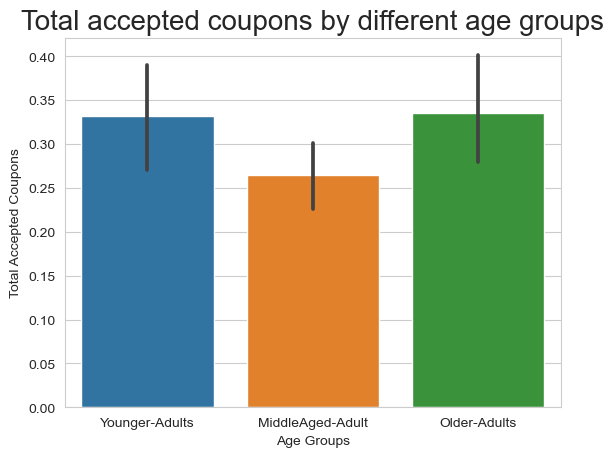

In [107]:
sns.barplot(y=data.total_accepted_coupons, x=data.age_cat, data=data)
plt.title(f'Total accepted coupons by different age groups',fontsize=20)
plt.xlabel('Age Groups')
plt.ylabel('Total Accepted Coupons')
plt.show()

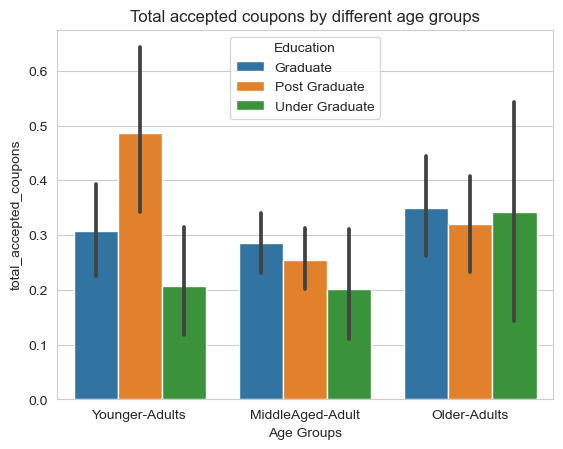

In [108]:
sns.barplot(y=data.total_accepted_coupons, x=data.age_cat,hue=data.Education, data=data)
plt.title(f'Total accepted coupons by different age groups')
plt.xlabel('Age Groups')
plt.show()

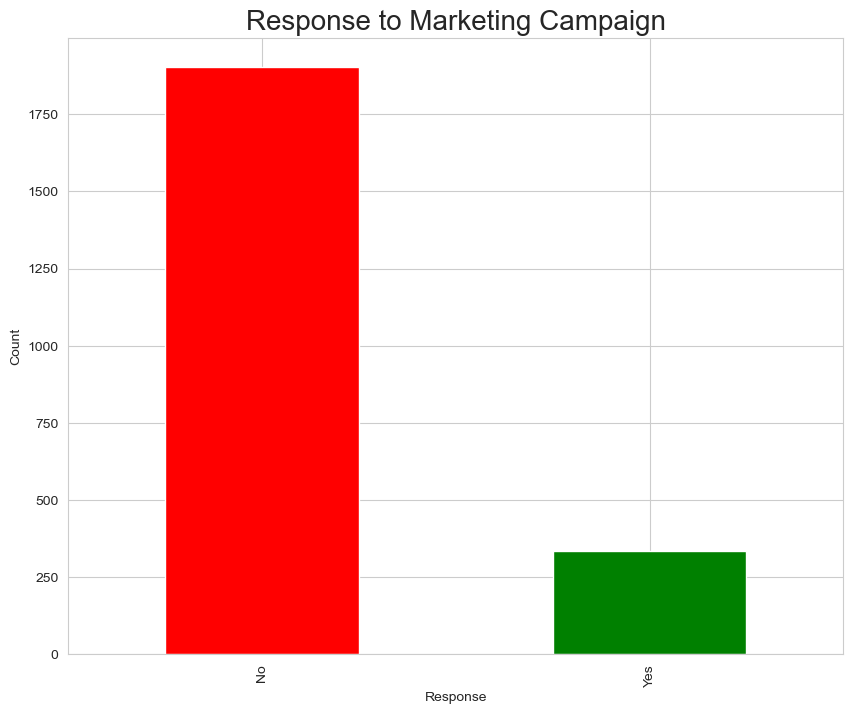

In [109]:
plt.figure(figsize=(10,8))
data.Response.value_counts().plot(kind='bar',color=['red','green'])
plt.title('Response to Marketing Campaign',fontsize=20)
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0,1],['No','Yes'])
plt.savefig('Marketing.png')

<AxesSubplot:xlabel='Response', ylabel='Income'>

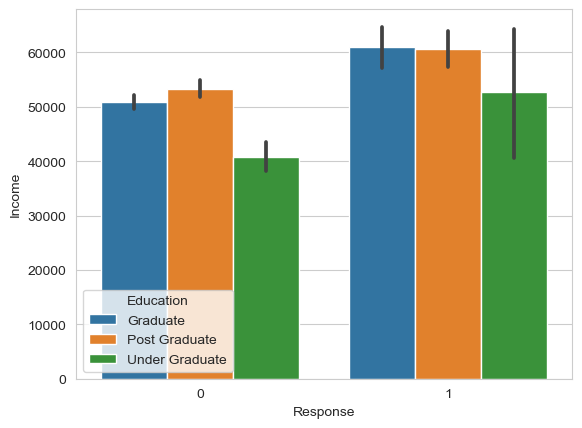

In [110]:
sns.barplot(x=data.Response,y=data.Income,data=data, hue=data.Education)

In [111]:
data['number_of_total_purchases']= data['NumDealsPurchases']+ data['NumWebPurchases']+data['NumCatalogPurchases']+  data['NumStorePurchases']

In [112]:
data.number_of_total_purchases

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: number_of_total_purchases, Length: 2236, dtype: int64

In [113]:
data.Recency

0       58
1       38
2       26
3       26
4       94
        ..
2235    46
2236    56
2237    91
2238     8
2239    40
Name: Recency, Length: 2236, dtype: int64

<AxesSubplot:xlabel='number_of_total_purchases', ylabel='Count'>

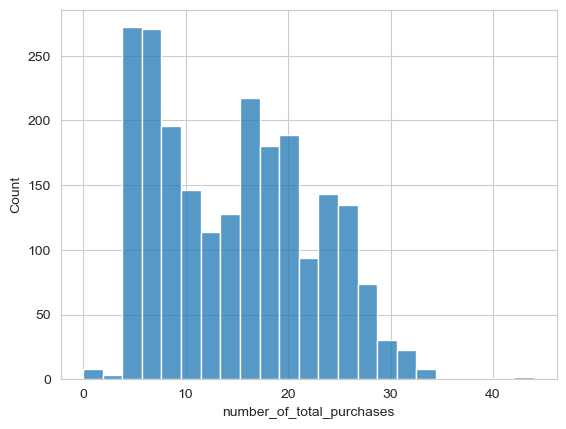

In [114]:
sns.histplot(data.number_of_total_purchases)

<AxesSubplot:xlabel='parent', ylabel='total_spent'>

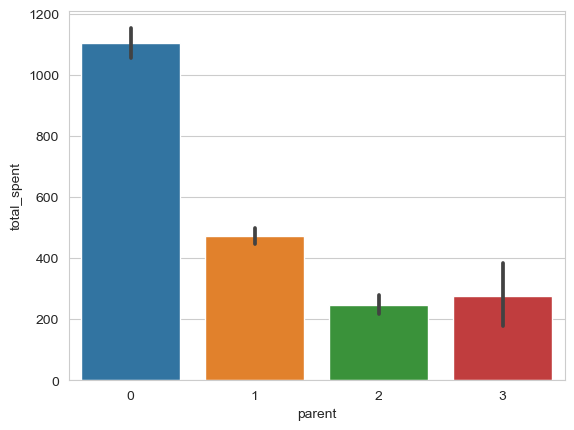

In [115]:
sns.barplot(y=data.total_spent, x=data.parent)

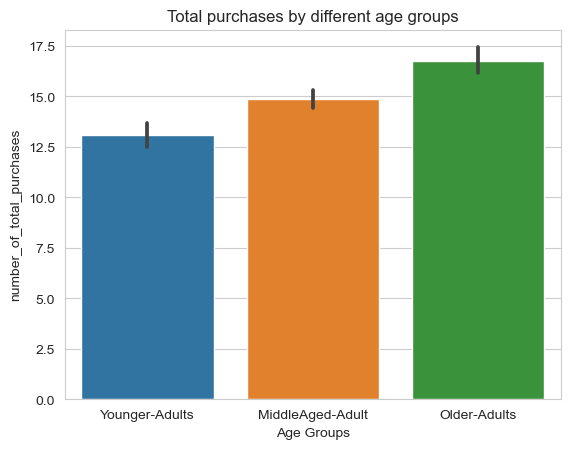

In [116]:
sns.barplot(y=data.number_of_total_purchases, x=data.age_cat, data=data)
plt.title(f'Total purchases by different age groups')
plt.xlabel('Age Groups')
plt.show()

In [117]:
## Label Encoding for relationship, education

In [118]:
### Model K means, DBSCAN, Dimension Reduction

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2236 non-null   int64         
 1   Year_Birth                 2236 non-null   int64         
 2   Education                  2236 non-null   object        
 3   Marital_Status             2236 non-null   object        
 4   Income                     2236 non-null   float64       
 5   Kidhome                    2236 non-null   int64         
 6   Teenhome                   2236 non-null   int64         
 7   Dt_Customer                2236 non-null   datetime64[ns]
 8   Recency                    2236 non-null   int64         
 9   MntWines                   2236 non-null   int64         
 10  MntFruits                  2236 non-null   int64         
 11  MntMeatProducts            2236 non-null   int64         
 12  MntFis

C:\Users\User\AppData\Local\Temp\ipykernel_7160\1180000205.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


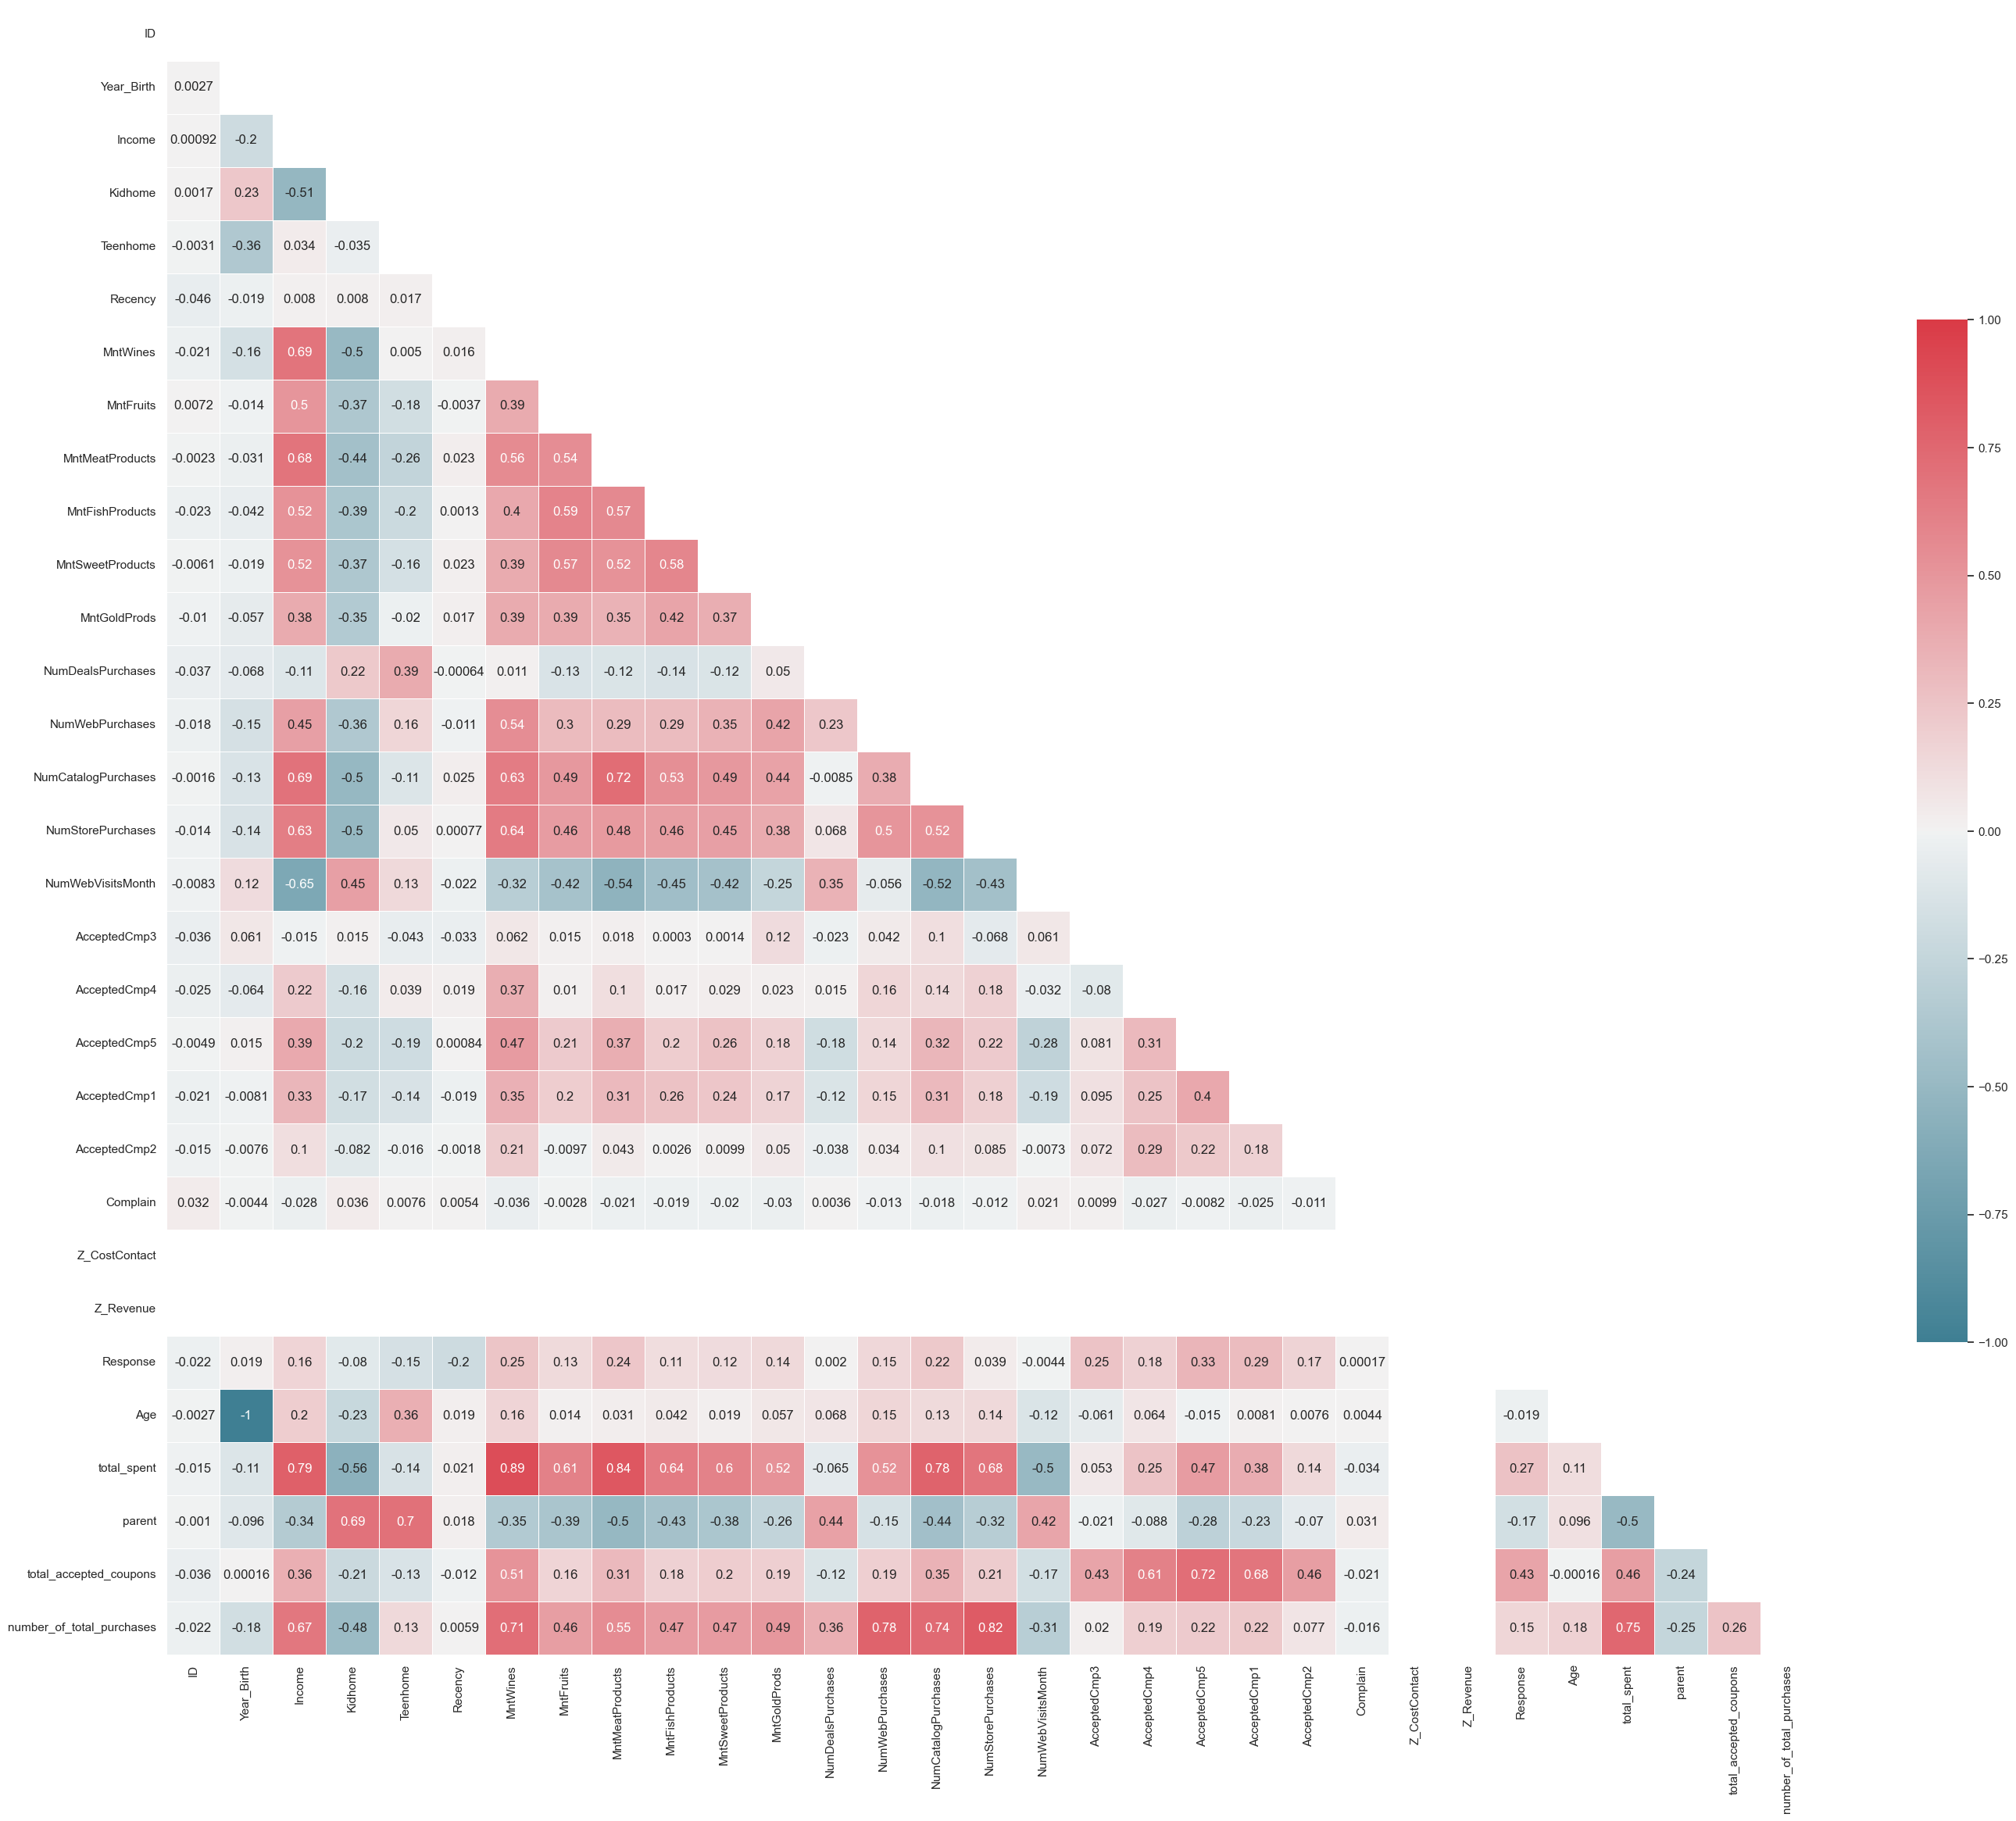

In [120]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(34, 34))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

Drop Zcostcotact and Z revenue

Some of the features are highly corelaeted so we use dimension reductionality to reduce dimension without losing much information

## Label Encoding

In [121]:
data.dtypes=='object'

ID                           False
Year_Birth                   False
Education                     True
Marital_Status                True
Income                       False
Kidhome                      False
Teenhome                     False
Dt_Customer                  False
Recency                      False
MntWines                     False
MntFruits                    False
MntMeatProducts              False
MntFishProducts              False
MntSweetProducts             False
MntGoldProds                 False
NumDealsPurchases            False
NumWebPurchases              False
NumCatalogPurchases          False
NumStorePurchases            False
NumWebVisitsMonth            False
AcceptedCmp3                 False
AcceptedCmp4                 False
AcceptedCmp5                 False
AcceptedCmp1                 False
AcceptedCmp2                 False
Complain                     False
Z_CostContact                False
Z_Revenue                    False
Response            

In [122]:
columns= data[['Education','Marital_Status']]

In [123]:
le=LabelEncoder()

In [124]:
for i in columns:
    data[i]= le.fit_transform(data[i])

In [125]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'total_spent', 'parent', 'age_cat', 'total_accepted_coupons',
       'number_of_total_purchases'],
      dtype='object')

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2236 non-null   int64         
 1   Year_Birth                 2236 non-null   int64         
 2   Education                  2236 non-null   int32         
 3   Marital_Status             2236 non-null   int32         
 4   Income                     2236 non-null   float64       
 5   Kidhome                    2236 non-null   int64         
 6   Teenhome                   2236 non-null   int64         
 7   Dt_Customer                2236 non-null   datetime64[ns]
 8   Recency                    2236 non-null   int64         
 9   MntWines                   2236 non-null   int64         
 10  MntFruits                  2236 non-null   int64         
 11  MntMeatProducts            2236 non-null   int64         
 12  MntFis

In [127]:
data.Education.value_counts()

0    1126
1     855
2     255
Name: Education, dtype: int64

## Standard Scaler

In [128]:
data.drop(['Dt_Customer','age_cat'],inplace=True, axis=1)

drop timestamp

In [129]:
scaler=StandardScaler()

In [130]:
scaled_data=scaler.fit_transform(data)

In [131]:
scaled_data= pd.DataFrame(scaled_data, index= data.index, columns= data.columns)

In [132]:
scaled_data

ID  Year_Birth  Education  Marital_Status    Income   Kidhome  \
0    -0.020039   -1.016868   -0.89438        1.347635  0.288513 -0.824939   
1    -1.052682   -1.273264   -0.89438        1.347635 -0.262438  1.032627   
2    -0.446351   -0.333146   -0.89438       -0.742041  0.917992 -0.824939   
3     0.182791    1.290693   -0.89438       -0.742041 -1.182621  1.032627   
4    -0.081689    1.034298    0.57070       -0.742041  0.295754  1.032627   
...        ...         ...        ...             ...       ...       ...   
2235  1.627875   -0.162216   -0.89438       -0.742041  0.432628 -0.824939   
2236 -0.489506   -1.956986    0.57070       -0.742041  0.563008  2.890194   
2237  0.518169    1.034298   -0.89438        1.347635  0.234465 -0.824939   
2238  0.815632   -1.102333    0.57070       -0.742041  0.807372 -0.824939   
2239  1.176286   -1.273264    0.57070       -0.742041  0.042374  1.032627   

      Teenhome   Recency  MntWines  MntFruits  ...  AcceptedCmp2  Complain  \
0    -0.930615  0.306856  0.983228   1.554170  ...     -0.116616 -0.095001   
1     0.905974 -0.383971 -0.871064  -0.636431  ...     -0.116616 -0.095001   
2    -0.930615 -0.798467  0.362159   0.572177  ...     -0.116616 -0.095001   
3    -0.930615 -0.798467 -0.871064  -0.560893  ...     -0.116616 -0.095001   
4    -0.930615  1.550344 -0.389661   0.421101  ...     -0.116616 -0.095001   
...        ...       ...       ...        ...  ...           ...       ...   
2235  0.905974 -0.107640  1.203128   0.421101  ...     -0.116616 -0.095001   
2236  0.905974  0.237773  0.302727  -0.661610  ...     -0.116616 -0.095001   
2237 -0.930615  1.446720  1.794481   0.546997  ...     -0.116616 -0.095001   
2238  0.905974 -1.420212  0.368102   0.093769  ...     -0.116616 -0.095001   
2239  0.905974 -0.314889 -0.654136  -0.586072  ...     -0.116616 -0.095001   

      Z_CostContact  Z_Revenue  Response       Age  total_spent    parent  \
0               0.0        0.0  2.386338  1.016868     1.680176 -1.264308   
1               0.0        0.0 -0.419052  1.273264    -0.962202  1.395139   
2               0.0        0.0 -0.419052  0.333146     0.282541 -1.264308   
3               0.0        0.0 -0.419052 -1.290693    -0.918994  0.065416   
4               0.0        0.0 -0.419052 -1.034298    -0.305762  0.065416   
...             ...        ...       ...       ...          ...       ...   
2235            0.0        0.0 -0.419052  0.162216     1.221499  0.065416   
2236            0.0        0.0 -0.419052  1.956986    -0.269201  2.724862   
2237            0.0        0.0 -0.419052 -1.034298     1.055312 -1.264308   
2238            0.0        0.0 -0.419052  1.102333     0.393886  0.065416   
2239            0.0        0.0  2.386338  1.273264    -0.721231  1.395139   

      total_accepted_coupons  number_of_total_purchases  
0                  -0.438933                   1.319340  
1                  -0.438933                  -1.155857  
2                  -0.438933                   0.798246  
3                  -0.438933                  -0.895310  
4                  -0.438933                   0.537699  
...                      ...                        ...  
2235               -0.438933                   0.407425  
2236                1.034721                   0.928519  
2237                1.034721                   0.537699  
2238               -0.438933                   1.058793  
2239               -0.438933                  -0.504489  

[2236 rows x 33 columns]

## Dimension Reductionality

In [133]:
pca=PCA()

In [134]:
pca.fit(scaled_data)

PCA()

In [135]:
(((pca.explained_variance_ratio_).cumsum())*100)

array([ 28.50344698,  37.92629214,  46.00389525,  51.89471897,
        56.09382645,  59.72080814,  63.17074828,  66.5138745 ,
        69.72465589,  72.84155418,  75.82464358,  78.54913927,
        81.10504207,  83.51789859,  85.51236424,  87.49297969,
        89.34220095,  91.10792671,  92.62677934,  94.07445931,
        95.49006553,  96.71860925,  97.83693582,  98.67609609,
        99.42258482, 100.        , 100.        , 100.        ,
       100.        , 100.        , 100.        , 100.        ,
       100.        ])

In [136]:
pca = PCA(n_components=13, random_state=42)
pca.fit(scaled_data)

pca_df = pd.DataFrame(pca.transform(scaled_data))

In [137]:
pca_df

0         1         2         3         4         5         6   \
0     4.398765 -0.591507 -1.132906  0.453052 -2.488614 -0.250035 -0.475025   
1    -2.924371 -1.177238  0.501771 -1.767242 -0.815670  1.064442 -0.539692   
2     1.951044 -0.406968 -1.501525 -0.302588  0.159201 -0.833949  0.182004   
3    -2.921573  1.753865 -0.583887  0.761095  0.557084  0.149645  0.814369   
4    -0.495350  0.257202 -0.874844  1.798731  1.297021  0.499409 -0.605046   
...        ...       ...       ...       ...       ...       ...       ...   
2231  2.463707 -1.602012 -1.006997  1.043181 -0.446920  0.594298  0.921666   
2232 -0.823434 -3.267288  3.607724  0.454224 -0.094027  1.915057  0.090464   
2233  2.229730  1.404370  0.660452  0.252459  2.739770 -0.953509 -0.515649   
2234  1.897136 -2.182697 -0.748399 -0.769724 -0.206823 -0.898950  1.345251   
2235 -2.090486 -1.418864  1.399647 -0.770800 -1.359127  0.005149  1.408898   

            7         8         9         10        11        12  
0    -1.716801 -0.116965 -0.026256 -0.063484 -2.033179  0.630118  
1    -1.231421 -1.207439  0.724304  0.420400  0.647890 -0.108506  
2     0.078737  0.222549 -0.765240  1.727695 -0.175861 -0.105679  
3     0.037935 -0.404414 -0.530003  1.000969 -0.066937 -0.251239  
4     0.689046  0.231418  0.482106 -0.692668 -0.716627  0.185566  
...        ...       ...       ...       ...       ...       ...  
2231  0.059764  0.559480 -2.435472 -0.077178 -0.334237  1.133209  
2232  1.498143 -1.486195  1.667548 -0.386617 -2.122681  0.770850  
2233 -2.374043  0.870523 -0.647969 -0.682576 -0.061850 -1.087751  
2234  1.046669 -0.255361 -0.142680  0.128394  0.798521  0.090070  
2235  0.580717 -0.733256  0.339005 -0.676378 -0.772692  0.225628  

[2236 rows x 13 columns]

## K means

In [138]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_df)
    Sum_of_squared_distances.append(km.inertia_)

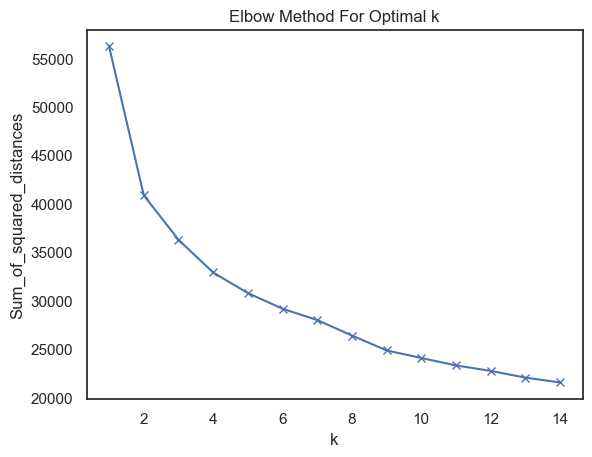

In [139]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [140]:
kmeans = KMeans(n_clusters=6, random_state=42)
data['Clusters'] = kmeans.fit_predict(pca_df)

<AxesSubplot:>

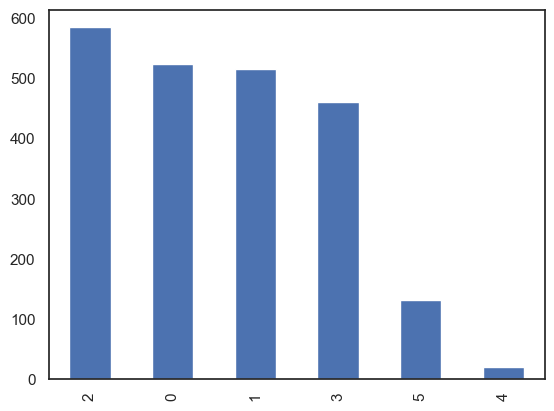

In [141]:
data.Clusters.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Clusters', ylabel='count'>

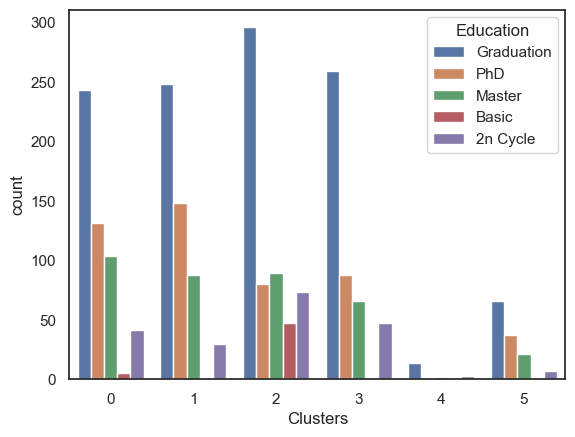

In [142]:
sns.countplot(x=data.Clusters, hue=df.Education, data=df)